**This Notebook provides a trend evaluation of Global life expectancy across the globe from 1960- 2023.**



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import country_converter as coco
import plotly.express as px
import seaborn as sns
from prophet import Prophet # prediction and forecasting Tool




In [2]:
!pip install country_converter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 2.9 MB/s eta 0:00:00


In [5]:
#downloading the data
df=pd.read_excel('/content/life expectancy 1961-2024.xlsx')
df.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,AFG,32.799,33.291,33.757,34.201,34.673,35.124,35.583,36.042,...,62.270,62.646,62.406,62.443,62.941,61.454,60.417,65.617,66.035,NaN
1,Albania,ALB,56.413,57.488,58.494,59.479,60.404,61.273,62.149,62.976,...,78.358,78.643,78.900,79.238,79.467,77.824,76.844,78.769,79.602,NaN
2,Algeria,DZA,40.839,40.792,39.527,43.143,42.987,42.846,42.745,42.731,...,75.159,75.310,75.431,75.555,75.682,73.257,75.208,76.129,76.261,NaN
3,American Samoa,ASM,65.053,65.648,66.008,66.161,66.135,65.996,58.284,65.807,...,72.654,72.640,72.801,72.794,72.751,72.672,72.708,72.752,72.852,NaN
4,Andorra,AND,72.094,72.573,72.993,73.298,73.624,73.856,74.020,74.119,...,84.532,84.489,84.359,84.242,84.098,79.418,82.331,84.016,84.041,NaN


In [6]:
df.tail()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
211,Virgin Islands (U.S.),VIR,62.743537,63.121707,62.668024,61.434707,64.124927,64.787927,63.677073,64.42561,...,79.017073,79.168293,79.368293,79.519512,79.668293,79.819512,80.068293,80.319512,80.519512,NaN
212,West Bank and Gaza,PSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,74.577000,74.917000,75.216000,75.380000,75.811000,74.998000,73.890000,76.662000,65.170000,NaN
213,"Yemen, Rep.",YEM,33.462000,34.058000,33.669000,33.431000,34.907000,35.592000,36.264000,37.07900,...,66.761000,67.105000,67.120000,65.915000,66.567000,66.435000,66.019000,67.952000,69.295000,NaN
214,Zambia,ZMB,50.648000,51.041000,51.331000,51.605000,51.170000,52.079000,52.290000,52.51200,...,60.728000,61.129000,61.564000,62.138000,62.914000,63.361000,62.363000,65.279000,66.349000,NaN
215,Zimbabwe,ZWE,53.492000,53.966000,54.453000,54.942000,55.431000,55.905000,56.359000,56.76600,...,58.989000,59.760000,60.263000,60.906000,61.060000,61.530000,60.135000,62.360000,62.775000,NaN


In [10]:
#characteristics of the data frame
df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
count,214.000000,215.000000,215.000000,214.000000,214.000000,214.000000,215.000000,215.000000,215.000000,215.000000,...,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,0.0
mean,54.822055,55.366829,55.810375,56.120028,56.623909,56.972623,57.419002,57.887049,58.214157,58.460216,...,72.074432,72.304505,72.461759,72.828601,72.992582,72.467916,71.761061,73.071483,73.766328,NaN
std,11.666956,11.607755,11.383876,11.315052,11.234249,11.251419,11.223287,11.124472,10.995034,10.992996,...,8.218041,8.170438,8.209305,7.722913,7.972247,7.402854,7.709407,7.942689,7.131008,NaN
min,28.054000,28.278000,28.506000,28.249000,31.231000,28.781000,25.633000,25.858000,26.103000,25.396000,...,39.757000,36.720000,35.351000,51.905000,31.530000,50.596000,40.279000,18.818000,54.462000,NaN
25%,44.725787,45.608341,46.480500,46.842250,47.756750,48.228750,48.726500,49.760000,50.411598,50.879000,...,65.994500,66.482750,66.765000,66.975500,67.271250,66.945750,66.387250,67.769250,68.447250,NaN
50%,56.476000,57.087000,57.742000,57.838500,58.168500,58.582000,59.232000,59.530000,59.767000,60.504000,...,73.539195,73.656915,74.009500,73.965500,74.105671,72.888500,72.204024,74.150988,74.524000,NaN
75%,64.929000,65.696500,65.861500,66.193250,66.476250,66.701866,67.341915,67.550976,67.921500,68.008500,...,78.158000,78.357250,78.558018,78.666768,78.681707,78.021750,77.224963,78.284250,79.004500,NaN
max,74.040073,73.652683,73.721951,73.586000,73.855927,74.106463,74.316195,74.499610,74.696171,74.842927,...,85.323000,85.630000,85.878000,86.084000,86.151000,86.089000,85.532683,85.746000,86.372000,NaN


In [11]:
df.describe (include='object')

,Country Name,Country Code
count,216,216
unique,216,216
top,Afghanistan,AFG
freq,1,1


In [12]:
df.nunique()

,0
Country Name,216
Country Code,216
1960,213
1961,214
1962,214
...,...
2020,216
2021,215
2022,214
2023,216


In [13]:
#rows and columns of the data frame
df.shape

(216, 67)

cleaning the data frame

In [14]:
#checking for missing values
df.isnull().sum()

,0
Country Name,0
Country Code,0
1960,2
1961,1
1962,1
...,...
2020,0
2021,0
2022,0
2023,0


In [15]:
#percentage of missing values
df.isnull().mean()*100

,0
Country Name,0.000000
Country Code,0.000000
1960,0.925926
1961,0.462963
1962,0.462963
...,...
2020,0.000000
2021,0.000000
2022,0.000000
2023,0.000000


In [16]:
#dropping columns with all missing values(unneccesary column)
print(df.columns)


Index(['Country Name', 'Country Code', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023', '2024'],
      dtype='object')


In [17]:
#checking for rows with missing values
df.isnull().any(axis=1).sum()


np.int64(216)

In [18]:
#filling in the row with Nan(missing values) values
years_to_fill = [str(y) for y in range(1960, 1989)]
df.loc[:, years_to_fill] = df.loc[:, years_to_fill].fillna(0)
print (df)



              Country Name Country Code       1960       1961       1962  \
0              Afghanistan          AFG  32.799000  33.291000  33.757000   
1                  Albania          ALB  56.413000  57.488000  58.494000   
2                  Algeria          DZA  40.839000  40.792000  39.527000   
3           American Samoa          ASM  65.053000  65.648000  66.008000   
4                  Andorra          AND  72.094000  72.573000  72.993000   
..                     ...          ...        ...        ...        ...   
211  Virgin Islands (U.S.)          VIR  62.743537  63.121707  62.668024   
212     West Bank and Gaza          PSE   0.000000   0.000000   0.000000   
213            Yemen, Rep.          YEM  33.462000  34.058000  33.669000   
214                 Zambia          ZMB  50.648000  51.041000  51.331000   
215               Zimbabwe          ZWE  53.492000  53.966000  54.453000   

          1963       1964       1965       1966      1967  ...       2015  \
0    34.20

In [19]:
df.loc[df['Country Name'] == 'West Bank and Gaza']


,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
212,West Bank and Gaza,PSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,74.577,74.917,75.216,75.38,75.811,74.998,73.89,76.662,65.17,NaN


In [20]:
print(df)

              Country Name Country Code       1960       1961       1962  \
0              Afghanistan          AFG  32.799000  33.291000  33.757000   
1                  Albania          ALB  56.413000  57.488000  58.494000   
2                  Algeria          DZA  40.839000  40.792000  39.527000   
3           American Samoa          ASM  65.053000  65.648000  66.008000   
4                  Andorra          AND  72.094000  72.573000  72.993000   
..                     ...          ...        ...        ...        ...   
211  Virgin Islands (U.S.)          VIR  62.743537  63.121707  62.668024   
212     West Bank and Gaza          PSE   0.000000   0.000000   0.000000   
213            Yemen, Rep.          YEM  33.462000  34.058000  33.669000   
214                 Zambia          ZMB  50.648000  51.041000  51.331000   
215               Zimbabwe          ZWE  53.492000  53.966000  54.453000   

          1963       1964       1965       1966      1967  ...       2015  \
0    34.20

In [21]:
if 'Country Code' in df.columns:
    print("'Country Code' column exists in the DataFrame.")
else:
    print("'Country Code' column does NOT exist in the DataFrame.")

print(df.columns)

'Country Code' column exists in the DataFrame.
Index(['Country Name', 'Country Code', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023', '2024'],
      dtype='object')


In [22]:
df

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,AFG,32.799000,33.291000,33.757000,34.201000,34.673000,35.124000,35.583000,36.04200,...,62.270000,62.646000,62.406000,62.443000,62.941000,61.454000,60.417000,65.617000,66.035000,NaN
1,Albania,ALB,56.413000,57.488000,58.494000,59.479000,60.404000,61.273000,62.149000,62.97600,...,78.358000,78.643000,78.900000,79.238000,79.467000,77.824000,76.844000,78.769000,79.602000,NaN
2,Algeria,DZA,40.839000,40.792000,39.527000,43.143000,42.987000,42.846000,42.745000,42.73100,...,75.159000,75.310000,75.431000,75.555000,75.682000,73.257000,75.208000,76.129000,76.261000,NaN
3,American Samoa,ASM,65.053000,65.648000,66.008000,66.161000,66.135000,65.996000,58.284000,65.80700,...,72.654000,72.640000,72.801000,72.794000,72.751000,72.672000,72.708000,72.752000,72.852000,NaN
4,Andorra,AND,72.094000,72.573000,72.993000,73.298000,73.624000,73.856000,74.020000,74.11900,...,84.532000,84.489000,84.359000,84.242000,84.098000,79.418000,82.331000,84.016000,84.041000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,Virgin Islands (U.S.),VIR,62.743537,63.121707,62.668024,61.434707,64.124927,64.787927,63.677073,64.42561,...,79.017073,79.168293,79.368293,79.519512,79.668293,79.819512,80.068293,80.319512,80.519512,NaN
212,West Bank and Gaza,PSE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,74.577000,74.917000,75.216000,75.380000,75.811000,74.998000,73.890000,76.662000,65.170000,NaN
213,"Yemen, Rep.",YEM,33.462000,34.058000,33.669000,33.431000,34.907000,35.592000,36.264000,37.07900,...,66.761000,67.105000,67.120000,65.915000,66.567000,66.435000,66.019000,67.952000,69.295000,NaN
214,Zambia,ZMB,50.648000,51.041000,51.331000,51.605000,51.170000,52.079000,52.290000,52.51200,...,60.728000,61.129000,61.564000,62.138000,62.914000,63.361000,62.363000,65.279000,66.349000,NaN


In [23]:
#dropping country code column
df.drop(columns=['Country Code'], inplace=True)
print(df.columns)

Index(['Country Name', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023', '2024'],
      dtype='object')


In [24]:
df.drop(columns=['2024'],inplace=True)
print(df.columns)

Index(['Country Name', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023'],
      dtype='object')


##**EXPLORATORY DATA ANALYSIS and PREDICTIONS**

####**Global Level Trends**

In [289]:
#average life expectancy across the countries
# Melting the wide format into long format
# Getting the list of year columns
year_cols = [col for col in df.columns if col.isdigit()]

df_long = df.melt(id_vars=["Country Name"], #keeping the country columns as they are.
                  value_vars=year_cols, # Melting the year columns
                  var_name="Year", # taking all those year columns (1960–2023) and put them into one new column called "Year".
                  value_name="LifeExpectancy") # the values under each year become entries in a column called "LifeExpectancy".

# Converting Year to integer
df_long["Year"] = df_long["Year"].astype(int)

print(df_long.head())

     Country Name  Year  LifeExpectancy
0     Afghanistan  1960          32.799
1         Albania  1960          56.413
2         Algeria  1960          40.839
3  American Samoa  1960          65.053
4         Andorra  1960          72.094


In [26]:
global_avg = df_long.groupby("Year")["LifeExpectancy"].mean().reset_index()
global_avg.rename(columns={"LifeExpectancy": "Global_Avg_LifeExpectancy"}, inplace=True)

print(global_avg.head())


   Year  Global_Avg_LifeExpectancy
0  1960                  54.314444
1  1961                  55.110501
2  1962                  55.551994
3  1963                  55.600398
4  1964                  56.099613


In [27]:
# Converting country names into continents
df["Continent"] = coco.convert(names=df["Country Name"], to="continent")

# Filtering only African countries
africa = df[df["Continent"] == "Africa"]

print(africa.head())

# Grouping by Continent and Year
# Get the list of year columns
year_cols = [col for col in df.columns if col.isdigit()]

df_long = df.melt(id_vars=["Country Name", "Continent"],
                  value_vars=year_cols, # Explicitly specify year columns as value_vars
                  var_name="Year", value_name="Life Expectancy")
df_long["Year"] = df_long["Year"].astype(int)

# Computing average per continent per year
regional_trends = df_long.groupby(["Continent", "Year"])["Life Expectancy"].mean().reset_index()



    Country Name    1960    1961    1962    1963    1964    1965    1966  \
2        Algeria  40.839  40.792  39.527  43.143  42.987  42.846  42.745   
5         Angola  37.933  36.902  37.168  37.419  37.704  37.968  38.258   
20         Benin  38.775  39.233  39.643  40.081  40.502  40.971  41.274   
25      Botswana  51.220  51.781  52.313  52.848  53.358  53.853  54.360   
30  Burkina Faso  36.074  36.361  36.753  37.093  37.399  37.758  38.091   

      1967    1968  ...    2015    2016    2017    2018    2019    2020  \
2   42.731  42.806  ...  75.159  75.310  75.431  75.555  75.682  73.257   
5   38.616  38.968  ...  61.042  61.619  62.122  62.622  63.051  63.116   
20  41.759  42.182  ...  59.123  59.283  59.528  59.710  59.888  60.154   
25  54.859  55.372  ...  63.215  64.320  65.420  66.371  67.167  67.643   
30  38.432  38.760  ...  58.778  59.173  59.578  59.972  60.184  60.454   

      2021    2022    2023  Continent  
2   75.208  76.129  76.261     Africa  
5   62.958  

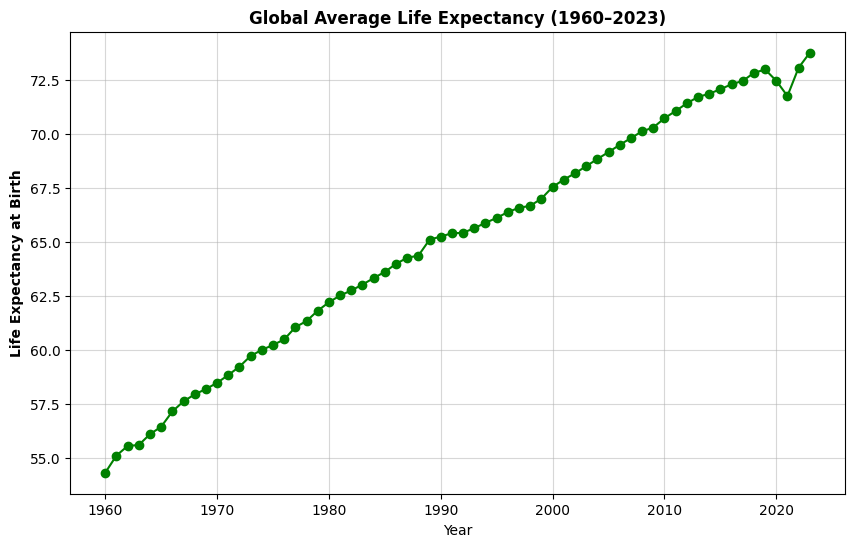

In [288]:
# Plotting the global average life expectancy across the years
plt.figure(figsize=(10,6))
plt.plot(global_avg["Year"], global_avg["Global_Avg_LifeExpectancy"], marker="o", color='green')
plt.title("Global Average Life Expectancy (1960–2023)", fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Life Expectancy at Birth", fontweight='bold')
plt.grid(True, alpha=0.5)
plt.show()


**summary on average global life expectancy**

Key Observations

Steady Growth:
Life expectancy rose steadily from ~54 years in 1960 to about 73–74 years in 2023.

Acceleration in 2000s:
From around 2000 onward, the growth trend appears stronger, showing consistent improvements.

Plateau & Fluctuations (2015–2023):
Around 2015–2020, the global average started to flatten slightly, followed by a dip around 2020–2021 (likely due to the COVID-19 pandemic).

Recovery in Recent Years:
After the dip, life expectancy rebounds again in 2022–2023, reaching its highest recorded point.

###**comparison of life expectancy across the continents**

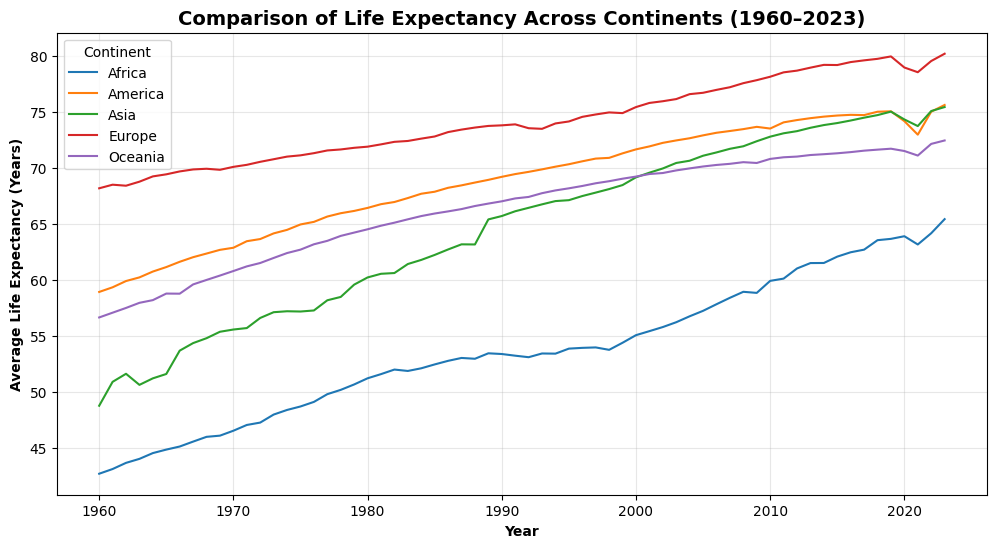

In [116]:
plt.figure(figsize=(12,6))
for continent in regional_trends["Continent"].unique():
    subset = regional_trends[regional_trends["Continent"] == continent]
    plt.plot(subset["Year"], subset["Life Expectancy"], label=continent)

plt.title("Comparison of Life Expectancy Across Continents (1960–2023)", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontweight='bold')
plt.ylabel("Average Life Expectancy (Years)", fontweight='bold')
plt.legend(title="Continent", )
plt.grid(True, alpha=0.3)
plt.show()

**Summary of compared life expectancy across the continents (1960-2023)**

1.  Europe leads consistently

Life expectancy in Europe starts around 68 years in 1960 and climbs steadily to over 80 years by 2023.

It has the highest life expectancy throughout the entire period.

2.  Africa lags behind but improves steadily

Africa starts at the lowest point (~43 years in 1960).

Growth is visible, reaching about 65 years by 2023.

Still remains the lowest compared to other continents, but the gap has narrowed slightly.

3.  Asia shows strong progress

Starts below 50 years in 1960.

Sharp increase especially after 1970s, almost catching up with the Americas.

By 2023, Asia is around 75–76 years.

4.  Americas maintain strong growth

Started higher than Asia (~59 years in 1960).

Growth continues but at a steadier pace, reaching ~75 years in 2023.

Asia nearly closes the gap with the Americas.

5.  Oceania is steady but slower in improvement

Starts around 57 years in 1960.

Gradual rise, ending near 72–73 years in 2023.

Growth is noticeable but less steep compared to Asia.

Equality Ratio of Life expectancy across the different continents

/tmp/ipython-input-3410408075.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_long[df_long["Year"] == 2023],x="Continent", y="Life Expectancy", palette="Set2")


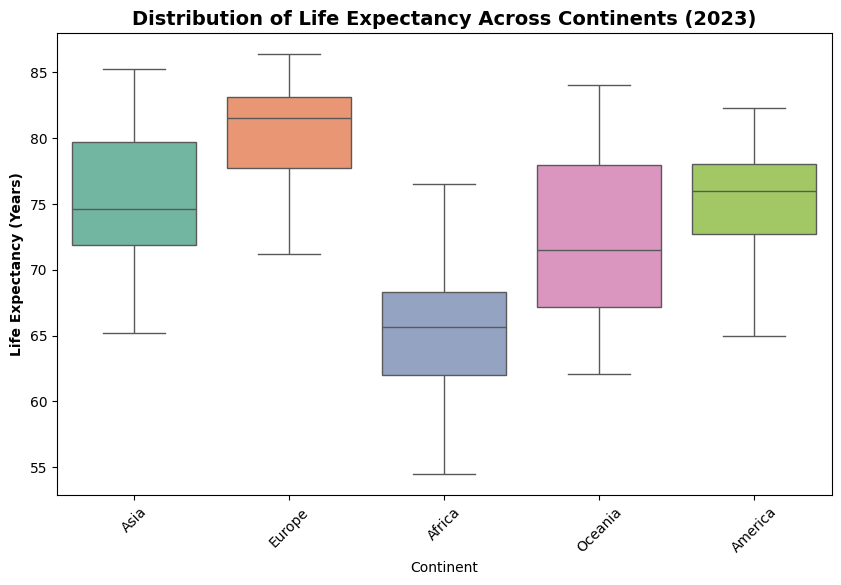

In [287]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_long[df_long["Year"] == 2023],x="Continent", y="Life Expectancy", palette="Set2")
plt.title("Distribution of Life Expectancy Across Continents (2023)", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel("Life Expectancy (Years)", fontweight='bold')
plt.show()


###**Summary of Life expectancy Distribution among the continents**

1.  Europe leads globally

Europe has the highest median life expectancy (~82 years).

The distribution is relatively tight, showing most countries in Europe cluster at the high end (80–85 years).

2.  Africa lags behind significantly

Africa has the lowest median (~65 years).

The spread is wide, with some countries as low as ~55 years and a few reaching into the 70s.

This highlights regional inequality.

3.  Asia is diverse

Median is ~75 years.

Wide spread: some countries in the mid-60s, while others approach 85 years.

Reflects large differences between high-income and lower-income nations.

4.  Oceania shows high variability

Median is ~71–72 years.

Very wide range: from low 60s up to the mid-80s.

Suggests big disparities between countries in the region (e.g., Australia vs Pacific Island nations).

5.  Americas are in the middle

Median around ~76 years.

Spread ranges from mid-60s to ~82 years.



###**Regional trend Analysis**

splitting the dataframe into continents

**AFRICAN TREND ANALYSIS**

In [31]:
# Merging the 'Continent' column from df into df_long (df_long introduces the year column)
# The 'Continent' column is already in df_long, so no merge is needed.
africa_df = df_long[df_long["Continent"] == "Africa"].copy()

# Displaying the head of the filtered DataFrame
print(africa_df.head())

    Country Name Continent  Year  Life Expectancy
2        Algeria    Africa  1960           40.839
5         Angola    Africa  1960           37.933
20         Benin    Africa  1960           38.775
25      Botswana    Africa  1960           51.220
30  Burkina Faso    Africa  1960           36.074


In [32]:
#africa average
africa_trend = (africa_df.groupby("Year")["Life Expectancy"]
                          .mean()
                          .reset_index())

africa_trend.rename(columns={"Life Expectancy": "Africa_Avg_LifeExpectancy"}, inplace=True)

print(africa_trend.head())

   Year  Africa_Avg_LifeExpectancy
0  1960                  42.658960
1  1961                  43.078978
2  1962                  43.629957
3  1963                  43.988394
4  1964                  44.504879


In [111]:
# Calculate average life expectancy trend across Africa
africa_trend = (africa_df.groupby("Year")["Life Expectancy"].mean().reset_index())

africa_trend.rename(columns={"Life Expectancy": "Africa_Avg_LifeExpectancy"}, inplace=True)

print("Created africa_trend DataFrame:")
print(africa_trend.head())

Created africa_trend DataFrame:
   Year  Africa_Avg_LifeExpectancy
0  1960                  42.658960
1  1961                  43.078978
2  1962                  43.629957
3  1963                  43.988394
4  1964                  44.504879


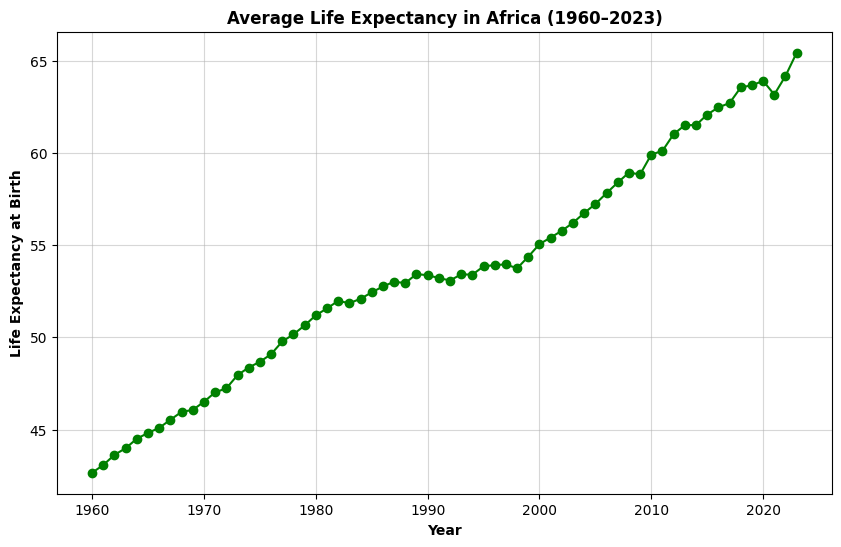

In [110]:
#plotting average life expectancy trend across africa
plt.figure(figsize=(10,6))
plt.plot(africa_trend["Year"], africa_trend["Africa_Avg_LifeExpectancy"], marker="o", color="green")
plt.title("Average Life Expectancy in Africa (1960–2023)", fontweight='bold')
plt.xlabel("Year", fontweight='bold')
plt.ylabel("Life Expectancy at Birth", fontweight='bold')
plt.grid(True, alpha=0.5)
plt.show()


**summary of Average life expectancy in Africa 1960-2023**

Steady Growth Overall:
Life expectancy in Africa rose from ~43 years in 1961 to about 65 years in 2023.

Slower Growth in the 1980s–1990s:
The curve flattens between late 1980s and 1990s, reflecting challenges such as the HIV/AIDS epidemic, political instability, and limited healthcare infrastructure in many African nations.

Strong Recovery After 2000:
From the early 2000s onwards, life expectancy rises more sharply, reaching its highest level in 2023. This improvement aligns with better access to healthcare, vaccination programs, and disease control.

Recent Fluctuations (2018–2021):
Small dips around 2020–2021 suggest the impact of the COVID-19 pandemic, followed by a recovery in 2022–2023.

**Highest and Least Life expectancy countries in Africa**

In [108]:
# Computing the mean life expectancy per country (across all years)
avg_life = (africa_df.groupby("Country Name")["Life Expectancy"].mean().reset_index().sort_values(by="Life Expectancy", ascending=False))

# Selecting top 10 countries
top10_countries_africa = avg_life.head(10)["Country Name"].tolist()
print(top10_countries_africa)

['Seychelles', 'Mauritius', 'Tunisia', 'Libya', 'Cabo Verde', 'Algeria', 'Morocco', 'Egypt, Arab Rep.', 'Sao Tome and Principe', 'Gabon']


In [107]:
# Computeing the mean life expectancy per country across all years
avg_life = (africa_df.groupby("Country Name")["Life Expectancy"].mean() .reset_index().sort_values(by="Life Expectancy", ascending=False))

# Picking top 10 countries with highest average life expectancy
top10_avg = avg_life.head(10)
print(top10_avg)

             Country Name  Life Expectancy
42             Seychelles        69.411856
33              Mauritius        68.813267
50                Tunisia        65.953469
28                  Libya        65.387734
6              Cabo Verde        64.510328
0                 Algeria        62.099328
34                Morocco        61.076703
15       Egypt, Arab Rep.        60.760344
40  Sao Tome and Principe        60.064375
20                  Gabon        59.554469


/tmp/ipython-input-222888380.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_avg, x="Life Expectancy", y="Country Name", palette="viridis") # Choose a color palette


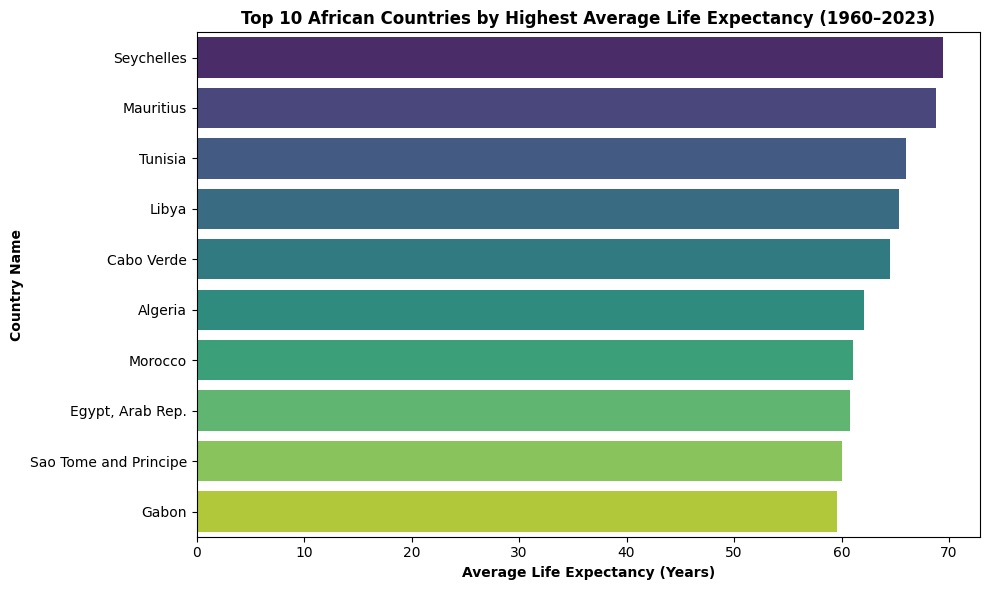

In [253]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_avg, x="Life Expectancy", y="Country Name", palette="viridis")

plt.title("Top 10 African Countries by Highest Average Life Expectancy (1960–2023)", fontweight='bold')
plt.xlabel("Average Life Expectancy (Years)", fontweight='bold')
plt.ylabel("Country Name", fontweight='bold')
plt.tight_layout()
plt.show()

In [38]:
avg_life = (africa_df.groupby("Country Name")["Life Expectancy"].mean().reset_index().sort_values(by="Life Expectancy", ascending=False))

# Selecting least 10 countries with average life expectancy
least_10_countries_africa = avg_life.tail(10)["Country Name"].tolist()
print(least_10_countries_africa)

['Somalia', 'Malawi', 'Angola', 'Central African Republic', 'Chad', 'Nigeria', 'Mali', 'Niger', 'Sierra Leone', 'South Sudan']


In [39]:
# Computing the mean life expectancy per country across all years
avg_life = (africa_df.groupby("Country Name")["Life Expectancy"].mean().reset_index().sort_values(by="Life Expectancy", ascending=False))

# Picking least 10 countries with average life expectancy
least_10_avg = avg_life.tail(10)
print(least_10_avg)

                Country Name  Life Expectancy
44                   Somalia        48.127453
30                    Malawi        47.427344
1                     Angola        47.304828
8   Central African Republic        46.308422
9                       Chad        46.244984
38                   Nigeria        46.197484
31                      Mali        45.976312
37                     Niger        45.929984
43              Sierra Leone        45.428203
46               South Sudan        38.991047


/tmp/ipython-input-1366874617.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=least_10_avg,x="Life Expectancy",y="Country Name",palette="cividis")


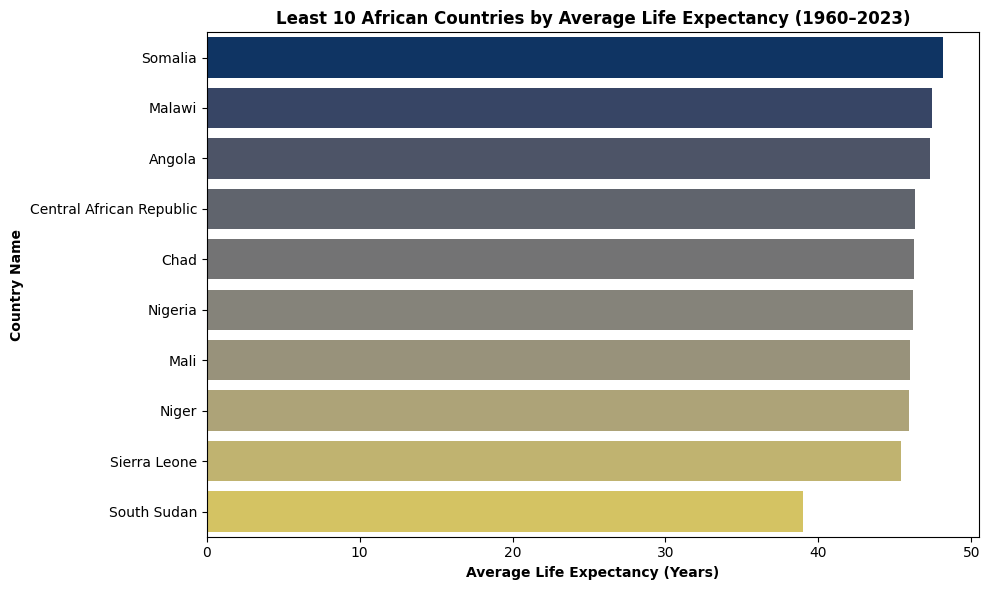

In [290]:
plt.figure(figsize=(10, 6))
sns.barplot(data=least_10_avg,x="Life Expectancy",y="Country Name",palette="cividis")

plt.title("Least 10 African Countries by Average Life Expectancy (1960–2023)", fontweight='bold')
plt.xlabel("Average Life Expectancy (Years)", fontweight='bold')
plt.ylabel("Country Name", fontweight='bold')
plt.tight_layout()
plt.show()

**Life expectancy Heat Map on African Countries 1960-2023**

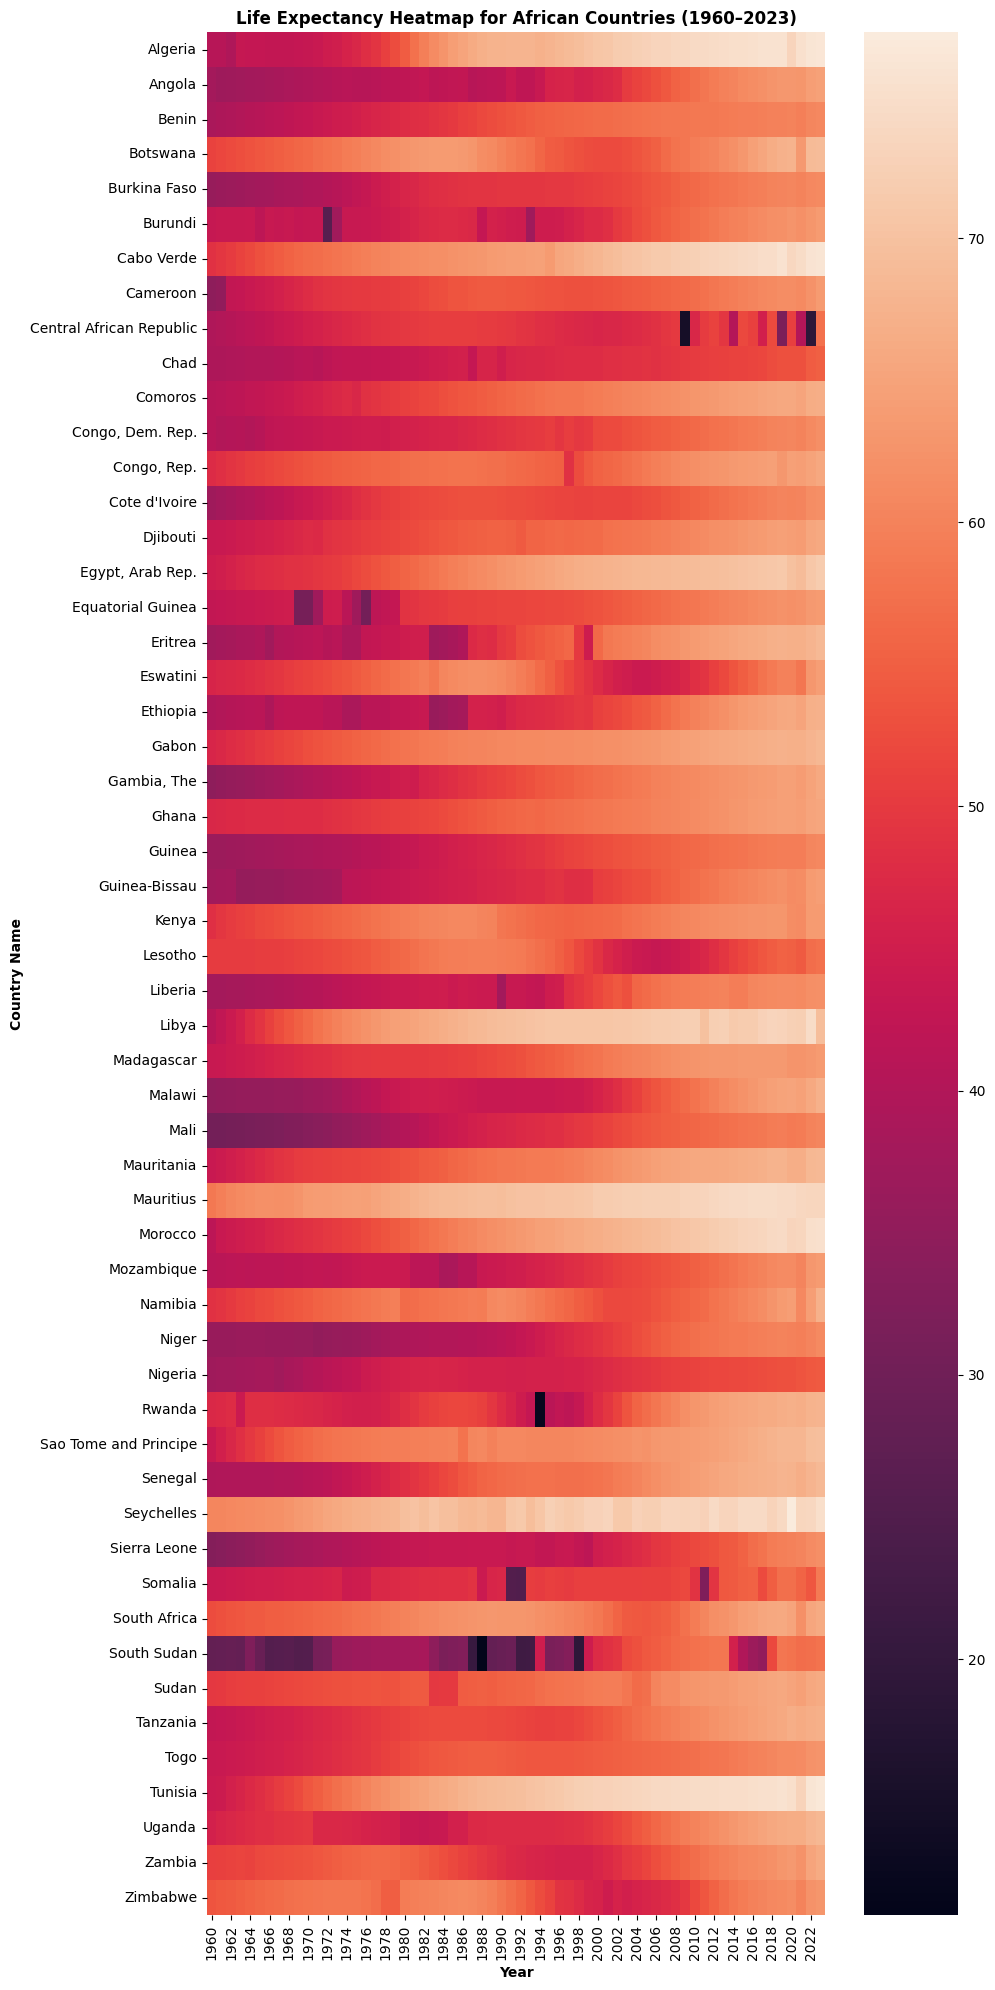

In [291]:
africa_pivot = africa_df.pivot(index="Country Name", columns="Year", values="Life Expectancy")

plt.figure(figsize=(10, 20))
sns.heatmap(africa_pivot, cmap=None, annot=False, fmt=".1f",annot_kws={'fontweight:bold'})
plt.title("Life Expectancy Heatmap for African Countries (1960–2023)",fontweight='bold')
plt.xlabel("Year", fontweight='bold')
plt.ylabel("Country Name", fontweight='bold')
plt.tight_layout()
plt.show()

###**prediction on Average life expectancy Africa 2024-2049**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvm4_ipr3/bx7xoopw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvm4_ipr3/s9n__1_2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73186', 'data', 'file=/tmp/tmpvm4_ipr3/bx7xoopw.json', 'init=/tmp/tmpvm4_ipr3/s9n__1_2.json', 'output', 'file=/tmp/tmpvm4_ipr3/prophet_model9hfenzlh/prophet_model-20250915112428.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:24:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:24:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages

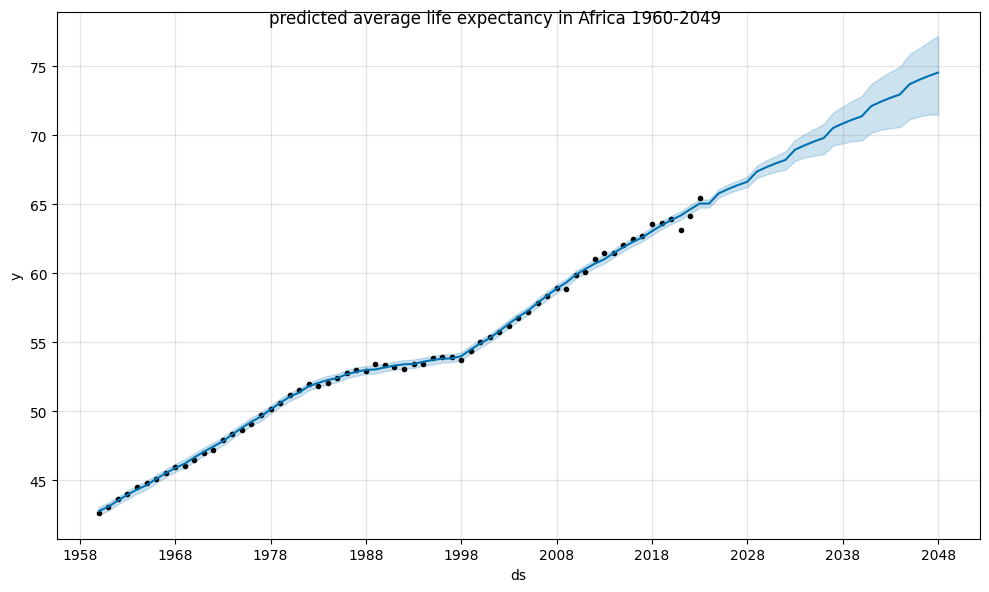

In [42]:
df_prophet_africa = africa_trend.rename(columns={"Year":"ds", "Africa_Avg_LifeExpectancy":"y"})

df_prophet_africa["ds"] = pd.to_datetime(df_prophet_africa["ds"], format="%Y") #converting the years to datetime (ds)

# Building and fitting the model
model = Prophet()
model.fit(df_prophet_africa)

# Future years
future = model.make_future_dataframe(periods=25, freq="Y")  # predict 25 years ahead
forecast = model.predict(future)

# Plot forecasting
fig = model.plot(forecast)
fig.suptitle ('predicted average life expectancy in Africa 1960-2049')
fig.show()

**Predicted average life expectancy in Africa 1960-2049**

Historical Growth (1960–2023):

Life expectancy increased steadily from ~43 years in 1960 to about 65 years by 2023.

The model captures past fluctuations, such as slower growth in the 1980s–1990s.

Future Predictions (2024–2049):

Life expectancy is forecasted to rise from ~65 years in 2023 to around 75 years by 2049.

The upward trend suggests continued improvements in healthcare, nutrition, and living standards.

Uncertainty Band:

The shaded region widens after ~2035, showing greater uncertainty in long-term forecasts.

Lower bound ~72 years, upper bound ~78 years by 2049.

**EAST AFRICAN TREND ANALYSIS**

In [43]:
#Splitting the df into east african countries
east_african_countries = [
    "Kenya", "Uganda", "Tanzania", "Rwanda", "Burundi",
    "South Sudan", "Ethiopia", "Eritrea", "Somalia",
    "Djibouti"
]


east_africa = df[df["Country Name"].isin(east_african_countries)]

print(east_africa.head())


    Country Name    1960    1961    1962    1963    1964    1965    1966  \
31       Burundi  43.262  43.364  43.492  43.559  43.601  41.844  43.529   
53      Djibouti  43.421  43.781  44.092  44.442  44.812  45.234  45.620   
60       Eritrea  37.443  37.912  38.346  38.833  39.184  39.576  37.634   
63      Ethiopia  39.615  40.198  40.531  40.967  41.261  41.413  39.343   
100        Kenya  48.477  49.330  50.104  50.758  51.323  51.886  52.383   

       1967    1968  ...    2015    2016    2017    2018    2019    2020  \
31   43.332  43.405  ...  60.107  60.789  61.345  61.806  62.180  62.569   
53   46.103  46.552  ...  62.833  63.335  63.710  64.105  64.381  64.200   
60   40.151  40.483  ...  65.909  66.242  66.612  66.979  67.306  66.980   
63   41.941  42.092  ...  63.592  64.162  64.766  65.257  65.741  65.969   
100  52.796  53.302  ...  62.279  62.526  62.725  62.825  62.939  61.596   

       2021    2022    2023  Continent  
31   62.101  62.882  63.651     Africa  
53  

In [297]:
# Filtering df_long for only East African countries
east_africa_df = df_long[df_long["Country Name"].isin(east_african_countries)].copy()

east_africa_df

,Country Name,Year,LifeExpectancy
31,Burundi,1960,43.262
53,Djibouti,1960,43.421
60,Eritrea,1960,37.443
63,Ethiopia,1960,39.615
100,Kenya,1960,48.477
...,...,...,...
13769,Rwanda,2023,67.785
13783,Somalia,2023,58.816
13785,South Sudan,2023,57.617
13798,Tanzania,2023,66.995


In [300]:
#east africa average
east_africa_trend = (east_africa_df.groupby("Year")["LifeExpectancy"].mean().reset_index())

print(east_africa_trend.head())

   Year  LifeExpectancy
0  1960         41.9066
1  1961         42.3100
2  1962         42.6881
3  1963         42.5994
4  1964         43.7084


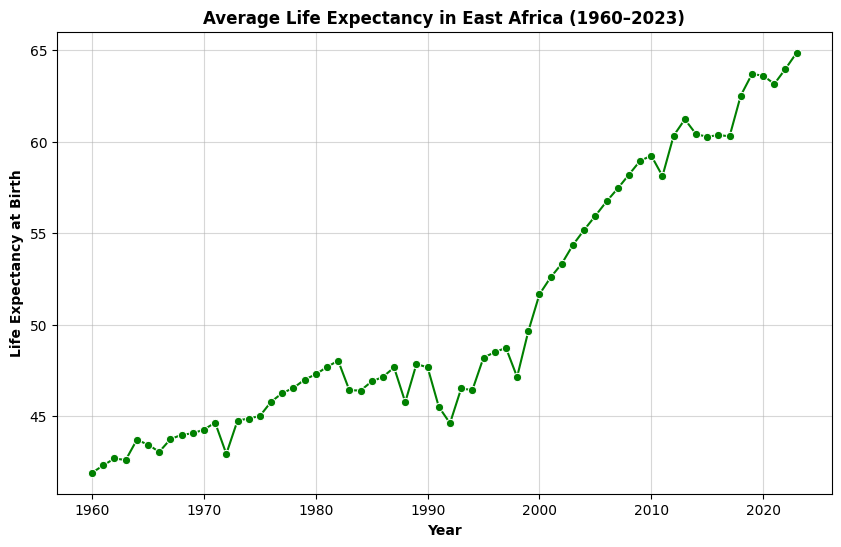

In [302]:
plt.figure(figsize=(10,6))
sns.lineplot(data=east_africa_trend, x='Year', y='LifeExpectancy', marker="o", color="green")
plt.title("Average Life Expectancy in East Africa (1960–2023)", fontweight='bold')
plt.xlabel("Year", fontweight='bold')
plt.ylabel("Life Expectancy at Birth", fontweight='bold')
plt.grid(True, alpha=0.5)
plt.show()

**Summary of Average Life Expectancy in East Africa (1960–2023)**

In 1960, the average life expectancy was just over 42 years.

The life expectancy has shown a consistent upward trend over the entire period, with a few plateaus and slight dips. For instance, there's a noticeable period of slower growth in the early to mid-1990s.

By 2023, the average life expectancy had risen to just over 65 years.

The most significant period of growth appears to be from the late 1990s to the present, with a particularly steep rise around the year 2000.

Life expectancy Heat Map EAST AFRICA 1960-2023

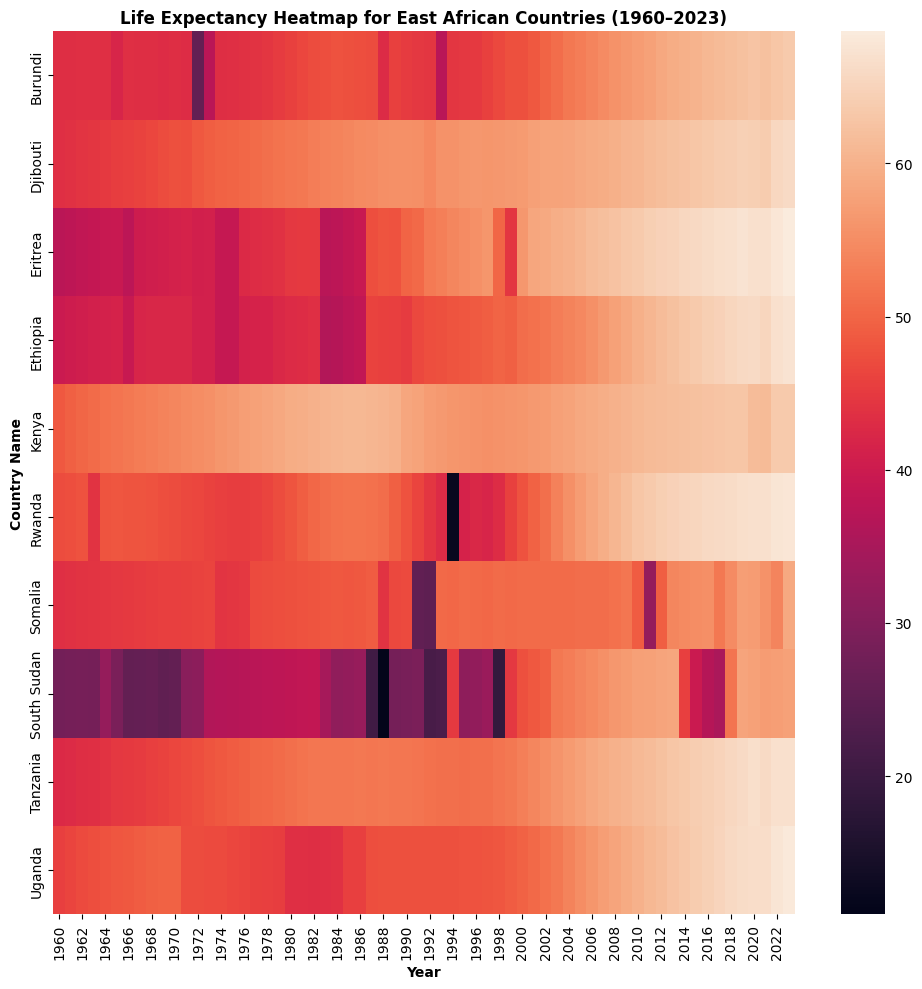

In [249]:
# Pivoting the data to get years as columns and countries as rows
east_africa_pivot = east_africa_df.pivot(index="Country Name", columns="Year", values="Life Expectancy")

plt.figure(figsize=(10, 10)) # Adjust figure size as needed
sns.heatmap(east_africa_pivot, cmap=None, annot=False, fmt=".1f") # annot=False to avoid clutter
plt.title("Life Expectancy Heatmap for East African Countries (1960–2023)", fontweight='bold')
plt.xlabel("Year", fontweight='bold')
plt.ylabel("Country Name", fontweight='bold')
plt.tight_layout()
plt.show()

In [48]:
avg_east_africa = (east_africa_df.groupby("Country Name")["Life Expectancy"]
                       .mean()
                       .reset_index()
                       .sort_values(by="Life Expectancy", ascending=False))

# Selecting top 10 countries
top_east_africa = avg_east_africa["Country Name"].tolist()
print(top_east_africa)

#MEAN LIFE EXPECTANCY IN EAST AFRICA

avg_east_africa = (east_africa_df.groupby("Country Name")["Life Expectancy"]
                       .mean()
                       .reset_index()
                       .sort_values(by="Life Expectancy", ascending=False))

# top 10 east african countries
East_Africa_top_avg = avg_east_africa
print(East_Africa_top_avg)

['Kenya', 'Djibouti', 'Tanzania', 'Rwanda', 'Uganda', 'Eritrea', 'Ethiopia', 'Burundi', 'Somalia', 'South Sudan']
  Country Name  Life Expectancy
4        Kenya        57.769016
1     Djibouti        54.918125
8     Tanzania        53.724406
5       Rwanda        51.923266
9       Uganda        51.893453
2      Eritrea        51.352719
3     Ethiopia        49.311672
0      Burundi        48.894469
6      Somalia        48.127453
7  South Sudan        38.991047


/tmp/ipython-input-2399952309.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


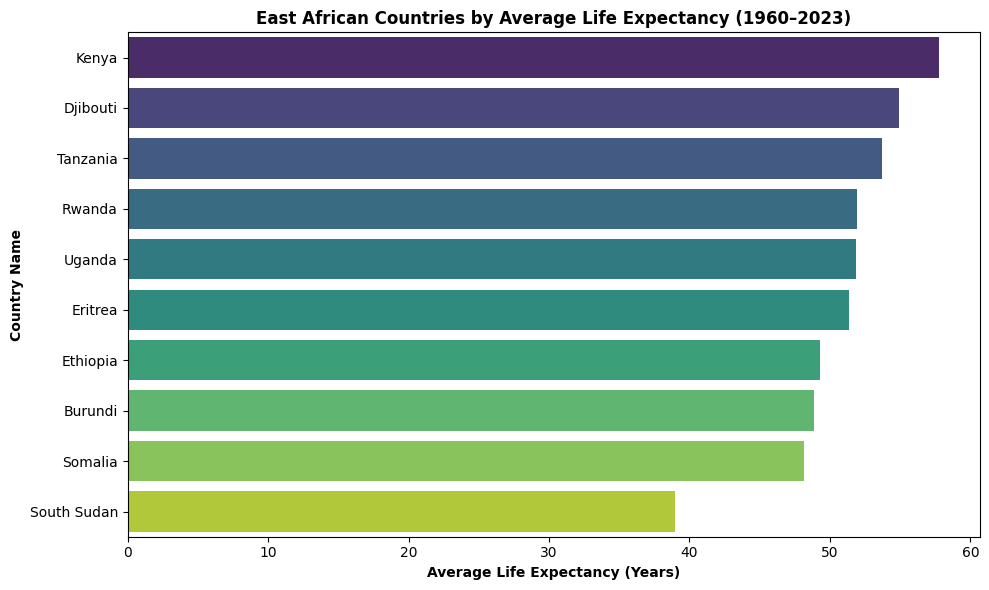

In [99]:
plt.figure(figsize=(10, 6)) # Adjust figure size as needed
sns.barplot(
    data=East_Africa_top_avg,
    x="Life Expectancy",
    y="Country Name",
    palette="viridis" # Choose a color palette
)

plt.title("East African Countries by Average Life Expectancy (1960–2023)", fontweight='bold')
plt.xlabel("Average Life Expectancy (Years)", fontweight='bold')
plt.ylabel("Country Name", fontweight='bold')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

**Future prediction East Africa**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvm4_ipr3/d64v10hz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvm4_ipr3/_7fudfdi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32942', 'data', 'file=/tmp/tmpvm4_ipr3/d64v10hz.json', 'init=/tmp/tmpvm4_ipr3/_7fudfdi.json', 'output', 'file=/tmp/tmpvm4_ipr3/prophet_modelf80csnwr/prophet_model-20250915112502.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:25:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:25:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages

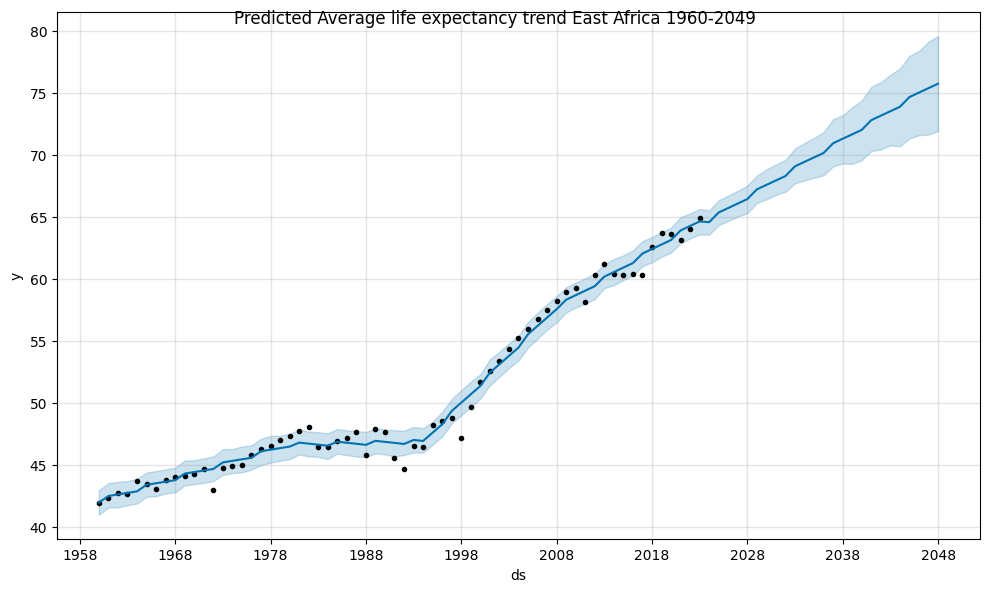

In [50]:
# Preparing data for Prophet
df_prophet = east_africa_trend.rename(columns={"Year":"ds", "East Africa_Avg_LifeExpectancy":"y"})

# coverting (years) ds as datetime
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"], format="%Y")

# Building and fitting model
model = Prophet()
model.fit(df_prophet)

# Future years
future = model.make_future_dataframe(periods=25, freq="Y")  # predict 25 years ahead
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
fig.suptitle("Predicted Average life expectancy trend East Africa 1960-2049") # Add title using suptitle
fig.show()

**Summary of Predicted Average life expectancy trend East Africa 1960-2049.**

Historical Trend (1960 - 2023): The average life expectancy has risen significantly. It started at just over 42 years in 1960 and reached slightly more than 65 years by 2023. The graph shows a consistent, though not always smooth, upward trajectory.

Projected Trend (2024 - 2049): The graph projects that the life expectancy will continue to increase. The line climbs from 65 years in 2024 and is predicted to reach approximately 75 years by the year 2049.

###**Kenya Trend Analysis**

In [51]:
kenya = df[df['Country Name'] == 'Kenya'] # singling out kenya row from the data set
print(kenya)



    Country Name    1960   1961    1962    1963    1964    1965    1966  \
100        Kenya  48.477  49.33  50.104  50.758  51.323  51.886  52.383   

       1967    1968  ...    2015    2016    2017    2018    2019    2020  \
100  52.796  53.302  ...  62.279  62.526  62.725  62.825  62.939  61.596   

       2021    2022    2023  Continent  
100  61.225  63.549  63.646     Africa  

[1 rows x 66 columns]


In [52]:
kenya_df = df_long[df_long["Country Name"] == 'Kenya'].copy() # adding the year column to match with the different year trend
print(kenya_df)

      Country Name Continent  Year  Life Expectancy
100          Kenya    Africa  1960           48.477
316          Kenya    Africa  1961           49.330
532          Kenya    Africa  1962           50.104
748          Kenya    Africa  1963           50.758
964          Kenya    Africa  1964           51.323
...            ...       ...   ...              ...
12844        Kenya    Africa  2019           62.939
13060        Kenya    Africa  2020           61.596
13276        Kenya    Africa  2021           61.225
13492        Kenya    Africa  2022           63.549
13708        Kenya    Africa  2023           63.646

[64 rows x 4 columns]


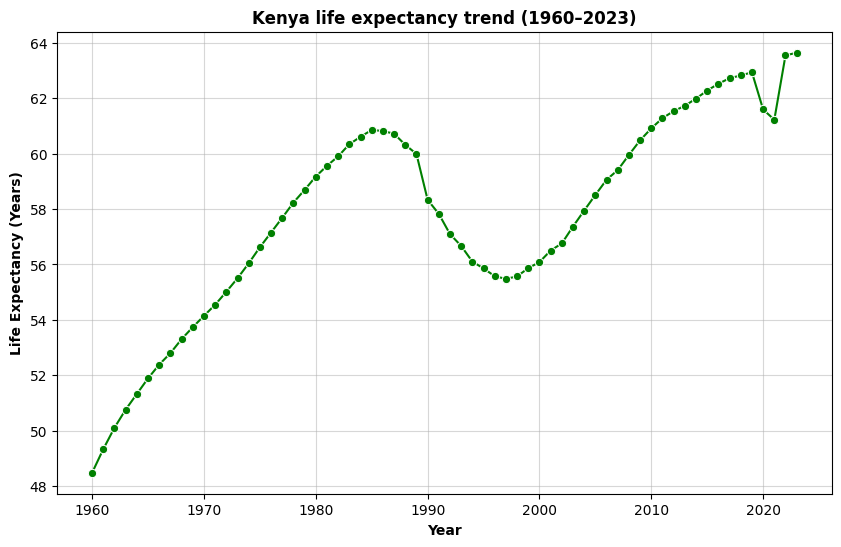

In [285]:
plt.figure(figsize=(10, 6)) # Adjust figure size as needed
sns.lineplot(data=kenya_df,x="Year", y="Life Expectancy", marker='o', color='green')

plt.title("Kenya life expectancy trend (1960–2023)", fontweight='bold')
plt.xlabel("Year", fontweight='bold')
plt.ylabel("Life Expectancy (Years)", fontweight='bold')
plt.grid(True, alpha=0.5)
plt.show()

####**Prediction on Life expectancy in Kenya 1960-2049**





**Summary of Kenya life expectancy trend (1960–2023)**

From 1960 to 1985, life expectancy in Kenya increased significantly, from about 48 years to over 60 years.

However, between 1985 and 2000, there was a sharp decline, with life expectancy falling to below 56 years. This dip is likely related to the impact of the HIV/AIDS epidemic in the region during that period.

Following the year 2000, life expectancy in Kenya began to recover and rise sharply, reaching its peak of almost 64 years by 2023.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvm4_ipr3/_7f82iqo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvm4_ipr3/1rrw9mpf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34991', 'data', 'file=/tmp/tmpvm4_ipr3/_7f82iqo.json', 'init=/tmp/tmpvm4_ipr3/1rrw9mpf.json', 'output', 'file=/tmp/tmpvm4_ipr3/prophet_model2fc0kwgr/prophet_model-20250915112544.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:25:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:25:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages

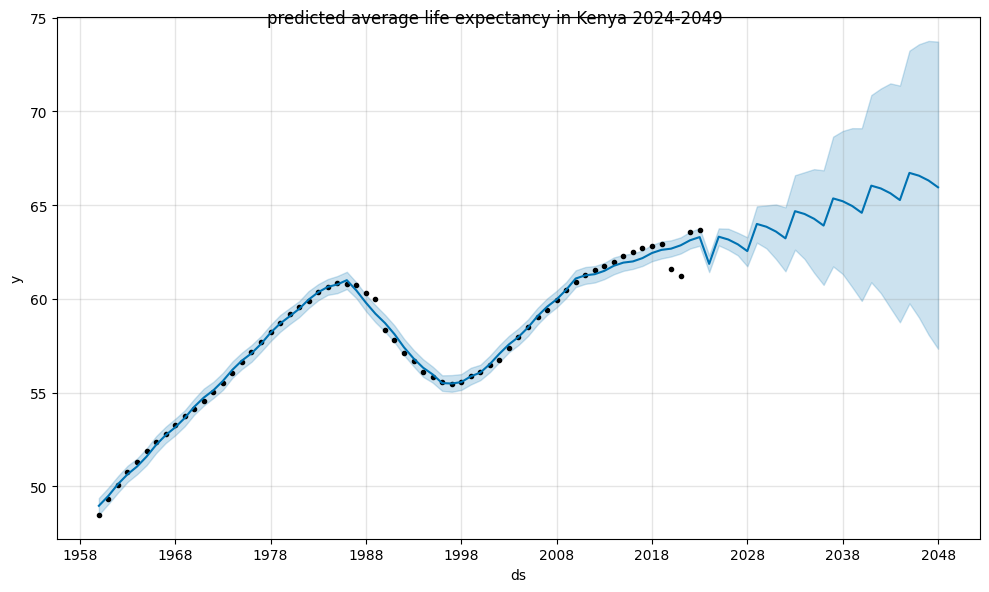

In [54]:
df_prophet_kenya = kenya_df.rename(columns={"Year":"ds", "Life Expectancy":"y"})

df_prophet_kenya["ds"] = pd.to_datetime(df_prophet_kenya["ds"], format="%Y") #Converting years to date_time (ds)

# Build and fit model
model = Prophet()
model.fit(df_prophet_kenya)

# Future years
future = model.make_future_dataframe(periods=25, freq="Y")  # predict 12 years ahead
forecast = model.predict(future)

# Plot forecasting
fig = model.plot(forecast)
fig.suptitle('predicted average life expectancy in Kenya 2024-2049')
fig.show()

**summary of predicted average life expectancy trend in kenya 1960-2049**

Continued Growth: The central, bold line indicates a strong upward trend in life expectancy, predicting a steady increase from the current levels.

Projected Values: The average life expectancy is predicted to rise from the low 60s in the early 2020s to well over 65 years by the late 2030s and potentially approaching 70 years by 2049.

**EUROPE TREND ANALYSIS**

In [55]:
europe_df=df_long[df_long['Continent']=='Europe'].copy() #singling out european countries from the df
europe_df

,Country Name,Continent,Year,Life Expectancy
1,Albania,Europe,1960,56.413000
4,Andorra,Europe,1960,72.094000
11,Austria,Europe,1960,68.585610
17,Belarus,Europe,1960,69.254610
18,Belgium,Europe,1960,69.701951
...,...,...,...,...
13786,Spain,Europe,2023,83.882927
13794,Sweden,Europe,2023,83.309756
13795,Switzerland,Europe,2023,84.056098
13810,Ukraine,Europe,2023,73.422000


In [56]:
#europe average
europe_trend=europe_df.groupby('Year')['Life Expectancy'].mean().reset_index()
europe_trend.rename(columns={"Life Expectancy": "Europe_Avg_LifeExpectancy"}, inplace=True)#renaming the life expectancy column to average life expectancy

print(europe_trend.head())

   Year  Europe_Avg_LifeExpectancy
0  1960                  68.189967
1  1961                  68.512778
2  1962                  68.421958
3  1963                  68.782233
4  1964                  69.255046


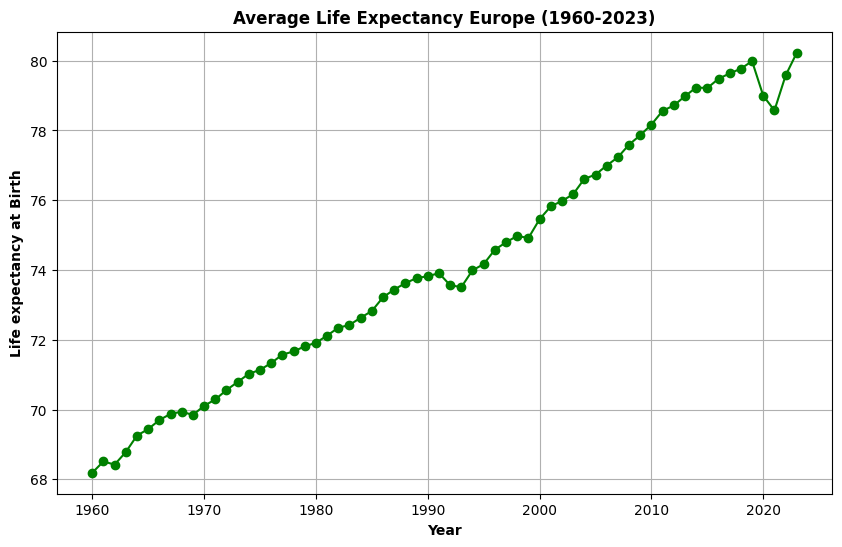

In [284]:
#plotting the average life expectancy curve for europe
plt.figure(figsize=(10,6))
plt.plot(europe_trend['Year'], europe_trend['Europe_Avg_LifeExpectancy'],marker='o',color='green')
plt.title('Average Life Expectancy Europe (1960-2023)', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Life expectancy at Birth',fontweight='bold')
plt. grid(True)
plt.show()

**Summary of Average life expectancy in Europe 1960-2023**


Steady Growth: Europe consistently shows the highest average life expectancy, starting around 68 years in 1960 and steadily increasing over the period.

Approaching 80: By 2023, the average life expectancy in Europe reaches over 80 years.

Impact of COVID-19: There is a noticeable dip in life expectancy around 2020-2021, likely due to the COVID-19 pandemic.

Recovery: Life expectancy shows a recovery in 2022 and 2023 after the dip.

Highest and least life expectancies across Europe

In [58]:
avg_europe=europe_df.groupby('Country Name')['Life Expectancy'].mean().reset_index().sort_values(by='Life Expectancy',ascending=False)
top10_european_countries=avg_europe.head(10)
top10_european_countries

,Country Name,Life Expectancy
1,Andorra,79.334172
29,Monaco,79.316453
38,San Marino,78.890016
18,Iceland,78.392234
43,Sweden,78.092481
44,Switzerland,77.951475
33,Norway,77.686288
11,Faroe Islands,77.550109
24,Liechtenstein,77.539369
31,Netherlands,77.344329


/tmp/ipython-input-3697297216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_european_countries, x='Life Expectancy',y='Country Name', palette='viridis')


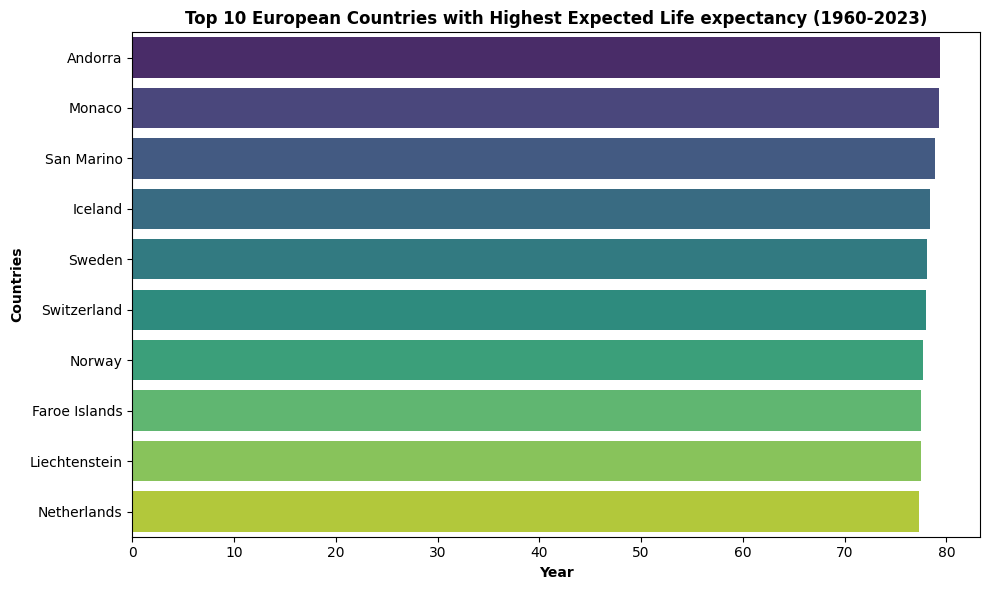

In [259]:
#average life expectancies of European countries with the highest average life expectancy rates
top10_european_countries=avg_europe.head(10)
#plotting the top 10 european countries with highest average life expectancies

plt.figure(figsize=(10,6))
sns.barplot(data=top10_european_countries, x='Life Expectancy',y='Country Name', palette='viridis')
plt.title('Top 10 European Countries with Highest Expected Life expectancy (1960-2023)', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Countries', fontweight='bold')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3827129115.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom10_european_countries, x='Life Expectancy',y='Country Name',palette='cividis')


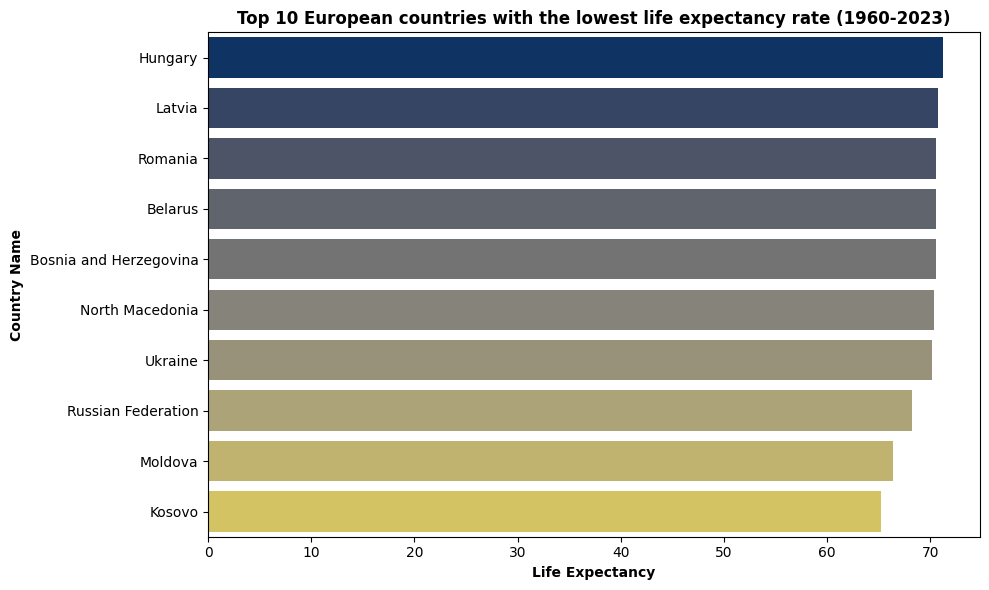

In [260]:
#least life expectancy across europe
bottom10_european_countries=avg_europe.tail(10)

#plotting bottom 10 european countries with the highest life expectancy rate at birth

plt.figure(figsize=(10,6))
sns.barplot(data=bottom10_european_countries, x='Life Expectancy',y='Country Name',palette='cividis')
plt.ylabel('Country Name', fontweight='bold')
plt.xlabel('Life Expectancy', fontweight='bold')
plt.title('Top 10 European countries with the lowest life expectancy rate (1960-2023)', fontweight='bold')
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

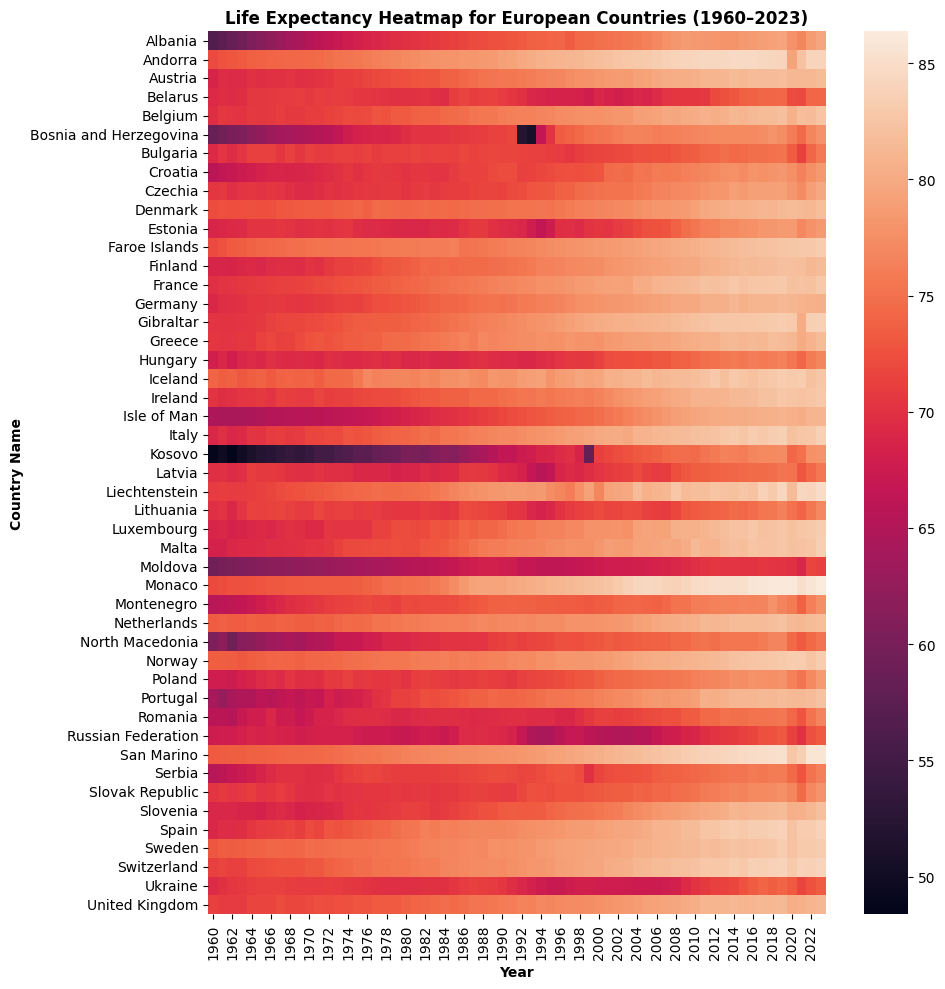

In [248]:
#european countries life expectancy heat map
europe_pivot=europe_df.pivot(index='Country Name',columns='Year',values='Life Expectancy')
plt.figure(figsize=(10,10))
sns.heatmap(europe_pivot,cmap=None, annot=False,fmt='.1f', annot_kws={'fontweight':'bold'})
plt.title('Life Expectancy Heatmap for European Countries (1960–2023)',fontweight='bold')
plt.xlabel('Year',fontweight='bold')
plt.ylabel('Country Name', fontweight='bold')
plt.tight_layout()
plt.show

**Prediction on Average Life expectancy Europe 2024-2049**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvm4_ipr3/8s45ksjm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvm4_ipr3/8lefh4te.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36111', 'data', 'file=/tmp/tmpvm4_ipr3/8s45ksjm.json', 'init=/tmp/tmpvm4_ipr3/8lefh4te.json', 'output', 'file=/tmp/tmpvm4_ipr3/prophet_modelt6us7y6u/prophet_model-20250915112718.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:27:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:27:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages

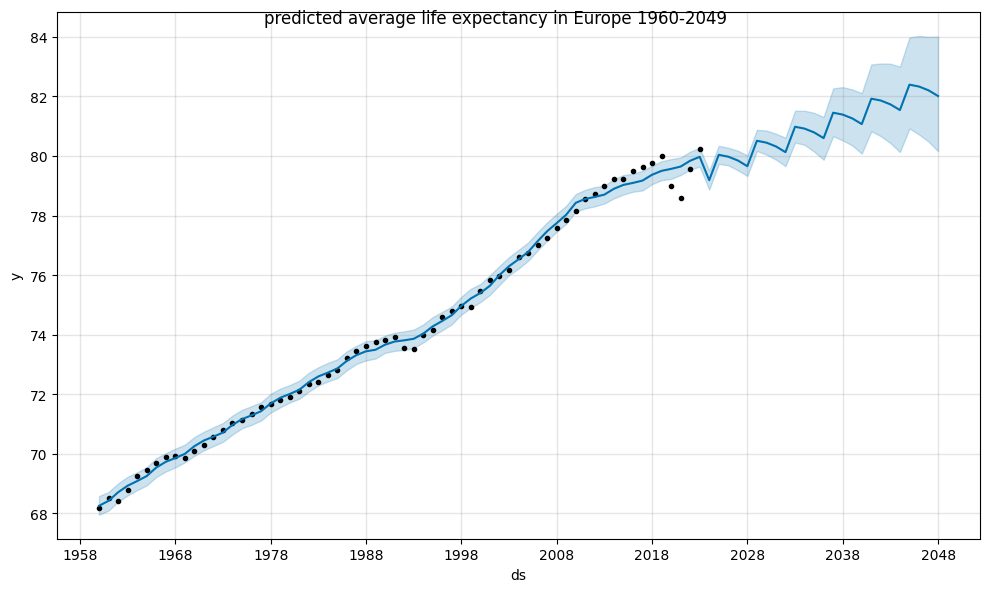

In [62]:
df_prophet_europe=europe_trend.rename(columns={'Year':'ds', 'Europe_Avg_LifeExpectancy':'y'})
df_prophet_europe['ds']=pd.to_datetime(df_prophet_europe['ds'],format='%Y')#converting the years to datetime

#building and fitting the model
model_europe=Prophet() # building the model
model_europe.fit(df_prophet_europe) #fitting the model

#future years prediction

future_europe=model_europe.make_future_dataframe(periods=25,freq='Y')
forecast_europe=model_europe.predict(future_europe)

#Forecasting plot
fig_europe=model_europe.plot(forecast_europe)
fig_europe.suptitle ('predicted average life expectancy in Europe 1960-2049')
fig_europe.show()

**Summary of Predicted Average Life Expectancy in Europe (1960–2049)**

The chart above illustrates the historical trend and forecast of average life expectancy in Europe.  
Key insights:

- **Steady Growth:** Life expectancy increased from about **68 years in 1960** to nearly **80 years by 2020**.  
- **Future Outlook:** The model projects a continued rise, reaching approximately **82–84 years by 2049**.  
- **Uncertainty Range:** The shaded blue area represents the prediction interval, showing that forecasts become less certain further into the future.

Overall, the visualization highlights a consistent upward trend, suggesting ongoing improvements in health and living conditions across Europe.


**America Trend Analysis**

In [63]:
#defining america
america_df = df_long[df_long['Continent'] == 'America'].copy()
america_df.head()

,Country Name,Continent,Year,Life Expectancy
6,Antigua and Barbuda,America,1960,62.635
7,Argentina,America,1960,64.242
9,Aruba,America,1960,64.049
13,"Bahamas, The",America,1960,62.454
16,Barbados,America,1960,64.149


In [64]:
# group the american data frame into average per year
america_trend = america_df.groupby('Year')['Life Expectancy'].mean().reset_index()

# renaming the life expectancy to average life expectancy
america_trend.rename(columns={'Life Expectancy': 'America_Avg_LifeExpectancy'}, inplace=True)
print(america_trend.head())

   Year  America_Avg_LifeExpectancy
0  1960                   58.919406
1  1961                   59.334797
2  1962                   59.894907
3  1963                   60.221153
4  1964                   60.743163


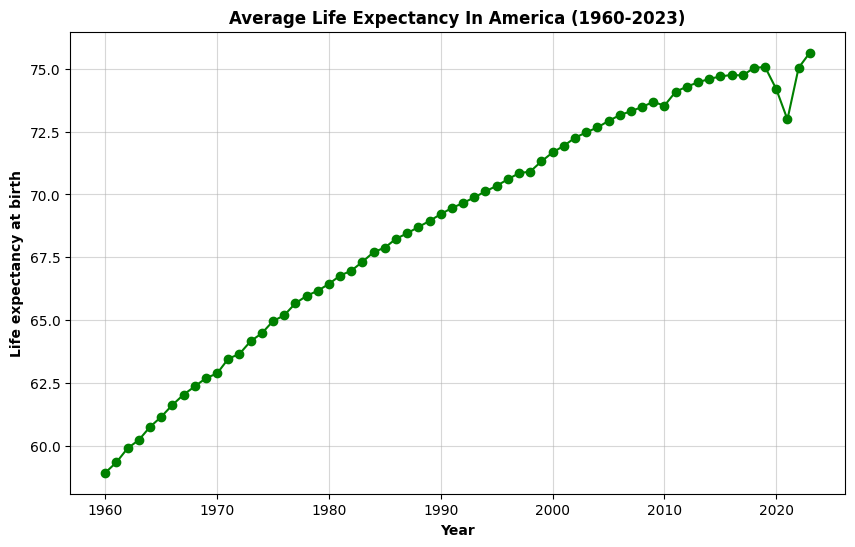

In [118]:
#plotting average lif expectancy trend in america
plt.figure(figsize=(10,6))
plt.plot(america_trend['Year'], america_trend['America_Avg_LifeExpectancy'], marker='o', color='green')
plt.title('Average Life Expectancy In America (1960-2023)', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Life expectancy at birth', fontweight='bold')
plt.grid(True, alpha=0.5)
plt.show()

**Summary of  Average Life Expectancy in America (1960–2023)**



- **Long-Term Growth:** Life expectancy rose steadily from about **59 years in 1960** to around **75 years by 2023**.
- **Notable Dip:** A sharp decline occurred around **2020–2021**, likely reflecting the impact of the COVID-19 pandemic, before rebounding in the most recent years.
- **Overall Trend:** Despite short-term fluctuations, the long-term pattern shows substantial improvement in health outcomes over the past six decades.

This visualization highlights how public health crises can temporarily disrupt progress but also how life expectancy tends to recover over time.


**Highest and Least Life Expectancy Countries in America**

In [173]:
#Top amerian countries with highest life expectancy
avg_america=america_df.groupby ('Country Name')['Life Expectancy'].mean().reset_index().sort_values(by='Life Expectancy',ascending=False)
avg_america.head()

top10_countries_america = avg_america.head(10)["Country Name"].tolist()
print("Top 10 countries in America by average life expectancy:")
print(top10_countries_america)

Top 10 countries in America by average life expectancy:
['Canada', 'United States', 'Bermuda', 'St. Martin (French part)', 'Puerto Rico (US)', 'Costa Rica', 'Cuba', 'Antigua and Barbuda', 'Uruguay', 'Sint Maarten (Dutch part)']


/tmp/ipython-input-3240972865.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_countries_america,x='Life Expectancy',y='Country Name', palette='viridis' )


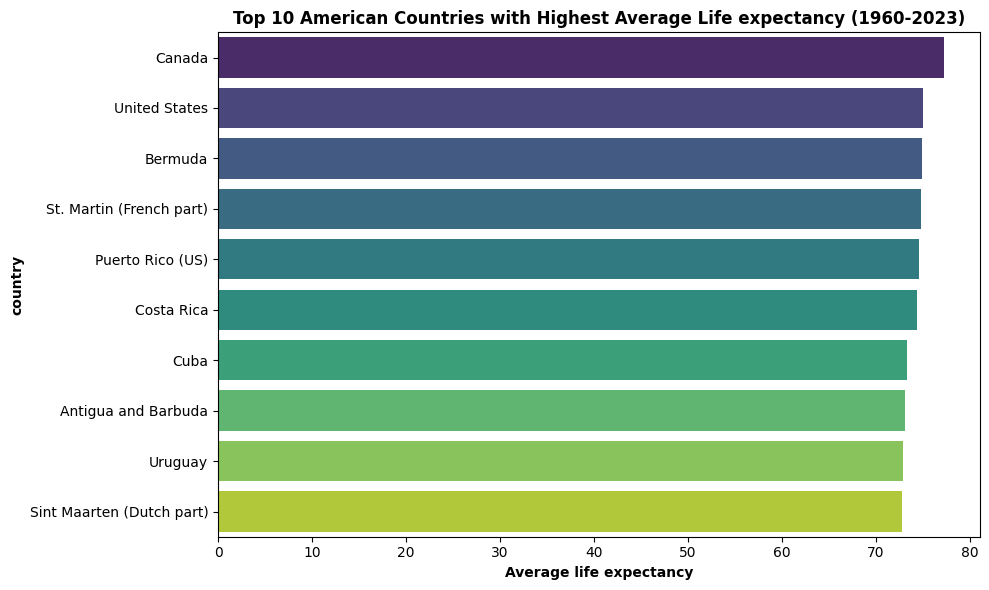

In [119]:
#plotting top 10 average highest life expectancy in america
top10_countries_america=avg_america.head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top10_countries_america,x='Life Expectancy',y='Country Name', palette='viridis' )
plt.title('Top 10 American Countries with Highest Average Life expectancy (1960-2023)', fontweight='bold')
plt.xlabel('Average life expectancy', fontweight='bold')
plt.ylabel('country', fontweight='bold')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3786674389.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=least10_countries_america,x='Life Expectancy', y='Country Name',palette='cividis')


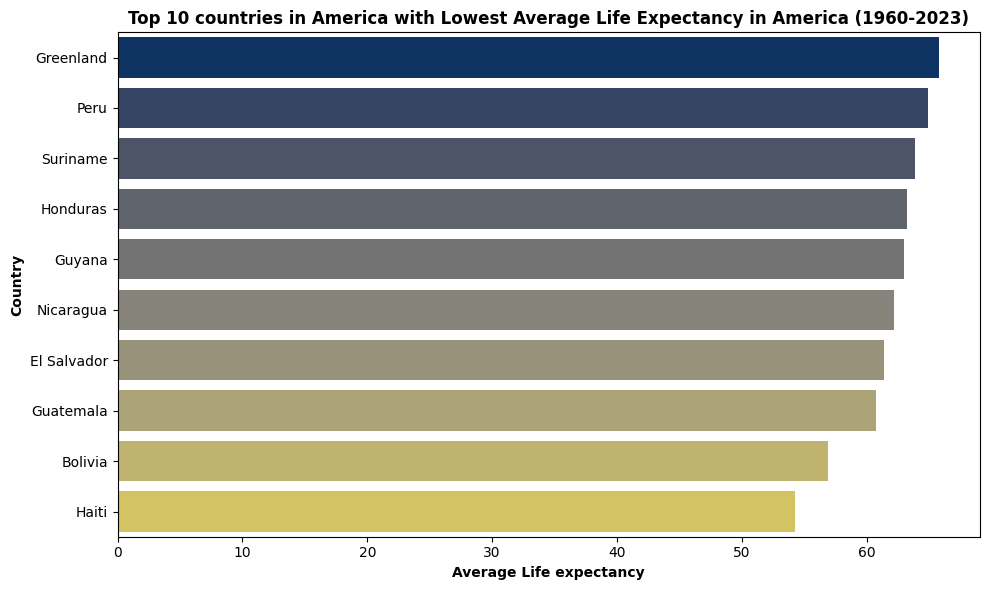

In [261]:
#plotting top 10 average lowest life expectancy in america
least10_countries_america=avg_america.tail(10)

plt.figure(figsize=(10,6))
sns.barplot(data=least10_countries_america,x='Life Expectancy', y='Country Name',palette='cividis')
plt.title('Top 10 countries in America with Lowest Average Life Expectancy in America (1960-2023)', fontweight='bold')
plt.xlabel('Average Life expectancy', fontweight='bold')
plt.ylabel('Country', fontweight='bold')
plt. tight_layout()
plt.show()

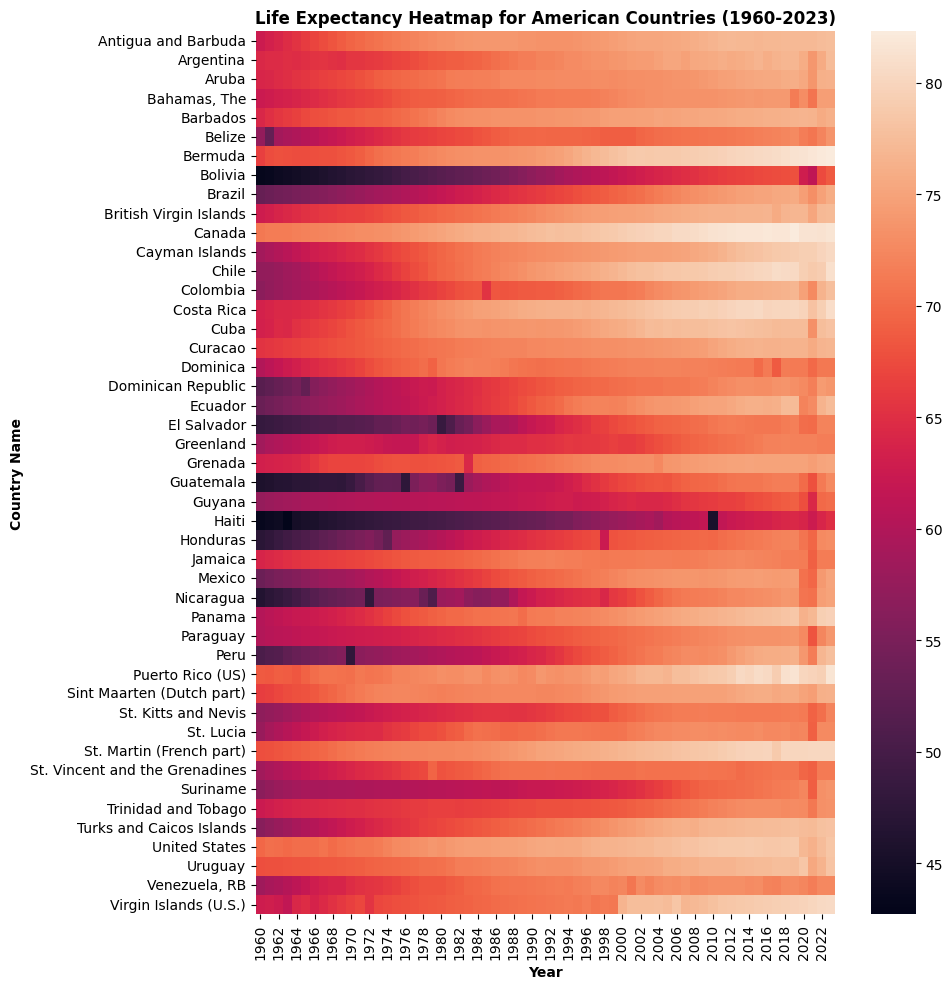

In [247]:
#heatmap for american life expectancy trend
america_pivot=america_df.pivot(index='Country Name',columns='Year',values='Life Expectancy')
plt.figure(figsize=(10,10))
sns.heatmap(america_pivot,cmap=None,annot=False, fmt='.1f',annot_kws={'fotweight':'bold'})
plt.title('Life Expectancy Heatmap for American Countries (1960-2023)', fontweight='bold')
plt.ylabel('Country Name', fontweight='bold')
plt.xlabel('Year',fontweight='bold')
plt.tight_layout()
plt.show()

### **Prediction on Average life expectancy America 2024-2049**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplfk7bor2/yhyijrbm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplfk7bor2/4hjr54c3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48254', 'data', 'file=/tmp/tmplfk7bor2/yhyijrbm.json', 'init=/tmp/tmplfk7bor2/4hjr54c3.json', 'output', 'file=/tmp/tmplfk7bor2/prophet_model643j18tb/prophet_model-20250914193849.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:38:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages

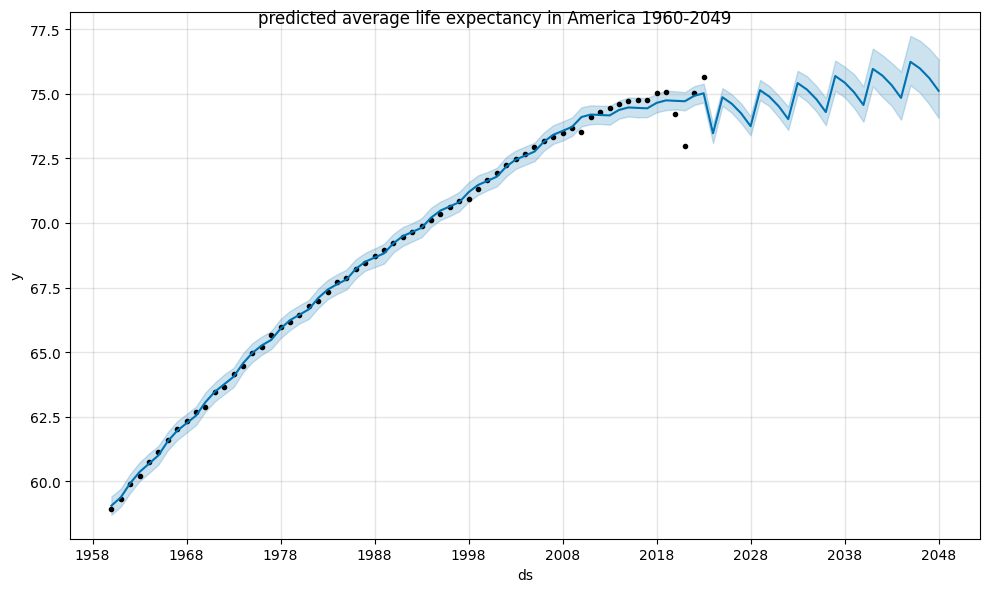

In [ ]:
df_prophet_america=america_trend.rename(columns={'Year':'ds','America_Avg_LifeExpectancy':'y'})
df_prophet_america['ds']=pd.to_datetime(df_prophet_america['ds'],format='%Y')
#training and fitting the model
model_america=Prophet()
model_america.fit(df_prophet_america)
#future years prediction
future_america=model_america.make_future_dataframe(periods=25, freq='Y')
forecast_america=model_america.predict(future_america)
#plotting the outcome
fig_america=model_america.plot(forecast_america)
fig_america.suptitle ('predicted average life expectancy in America 1960-2049')
fig_america.show()




**Summary of Predicted Average Life Expectancy in America (1960–2049)**

**Historical Trend (1960-~2019):** The graph shows a clear upward trend in life expectancy. The black dots represent the actual historical data points, and a dotted black line shows the general trend, indicating a steady increase over this period.

**Recent Anomaly (around 2020-2022):** There's a notable dip in the data points around 2020, likely reflecting the impact of the COVID-19 pandemic, which caused a temporary decrease in average life expectancy.

**Future Projection (2020-2049):** The solid blue line represents the predicted life expectancy. The light blue shaded area around it shows the range of potential outcomes, indicating the model's uncertainty.

**Cyclical Pattern:** The projection shows a slight, repeating wave-like or cyclical pattern, suggesting the model anticipates minor fluctuations in life expectancy in the future.

**Overall Prediction:** The overall prediction is that average life expectancy in America will continue to increase, reaching somewhere in the mid-70s by 2049. The uncertainty, however, widens over time, as shown by the expanding shaded area.

**ASIA TREND ANALYSIS**

In [177]:
#defining asia data frame
asia_df = df_long[df_long['Continent'] == 'Asia'].copy()
asia_df.head()

,Country Name,Continent,Year,Life Expectancy
0,Afghanistan,Asia,1960,32.799
8,Armenia,Asia,1960,59.063
12,Azerbaijan,Asia,1960,50.862
14,Bahrain,Asia,1960,50.634
15,Bangladesh,Asia,1960,43.980


In [214]:
# finding the average trend
asia_trend=asia_df.groupby('Year')['Life Expectancy'].mean().reset_index()
asia_trend.head()

,Year,Life Expectancy
0,1960,48.740024
1,1961,50.877853
2,1962,51.598900
3,1963,50.607969
4,1964,51.190523


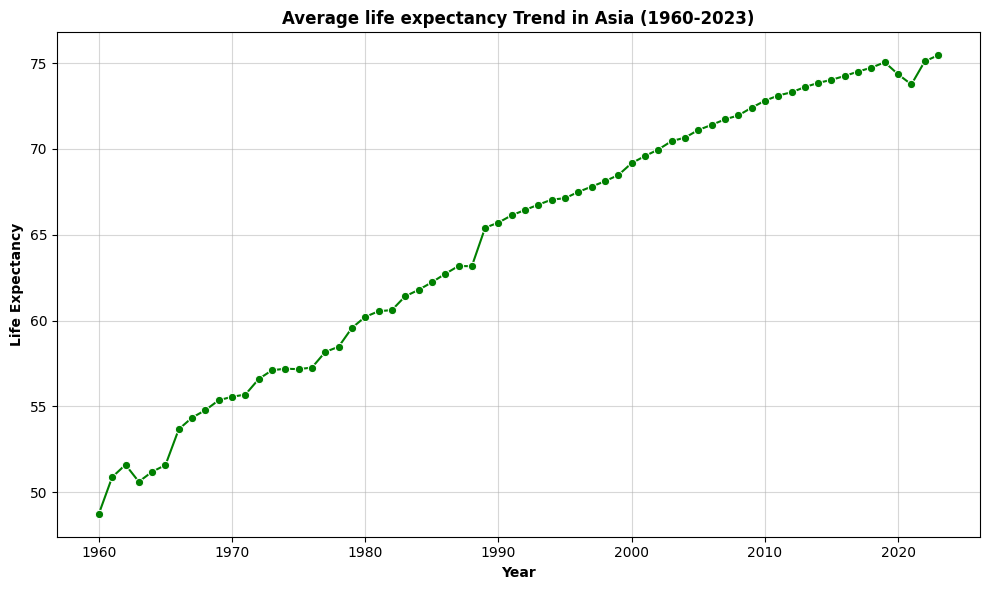

In [282]:
#plotting the average trend
plt.figure(figsize=(10,6))
sns.lineplot(data=asia_trend,y='Life Expectancy',x='Year', color='green',marker='o')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Life Expectancy',fontweight='bold')
plt.title('Average life expectancy Trend in Asia (1960-2023)', fontweight='bold')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

**summary of Asian Life Expectancy Trend 1960-2023**

Steady Increase: The most striking feature is the consistent upward trajectory. The average life expectancy in Asia has risen from around 48.5 years in 1960 to over 75 years by 2023.

Dramatic Gains in Earlier Decades: The curve is steeper in the earlier years, particularly from the 1960s to the 1990s, indicating a rapid improvement in life expectancy during that period. This is likely due to major advancements in public health, sanitation, nutrition, and medical technology spreading across the continent.

Slowing Rate of Increase: The rate of increase appears to slow down in the later decades, starting around the late 1990s. While life expectancy continued to rise, the curve flattens out, suggesting that while progress continues, it's at a more gradual pace.

COVID-19 Impact: Similar to the global trend, there is a small dip in the data points around 2020-2021, which reflects the negative impact of the COVID-19 pandemic on life expectancy before it quickly rebounded in the following years. This highlights a recent and temporary reversal in the long-term trend.

**highest and lowest countries in Asia on Average Life expectancy**

In [188]:
#highest asian countries
avg_asia=asia_df.groupby ('Country Name')['Life Expectancy'].mean().reset_index().sort_values(by='Life Expectancy',ascending=False)
avg_asia.head()

top10_countries_asia = avg_asia.head(10)['Country Name']
print("Top 10 countries in Asia by average life expectancy:")
print(top10_countries_asia)

Top 10 countries in Asia by average life expectancy:
17                   Japan
11    Hong Kong SAR, China
26        Macao SAR, China
37               Singapore
9                   Cyprus
22                  Kuwait
35                   Qatar
16                  Israel
3                  Bahrain
45    United Arab Emirates
Name: Country Name, dtype: object


/tmp/ipython-input-360050432.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_countries_asia,y='Country Name',x='Life Expectancy',palette='viridis')


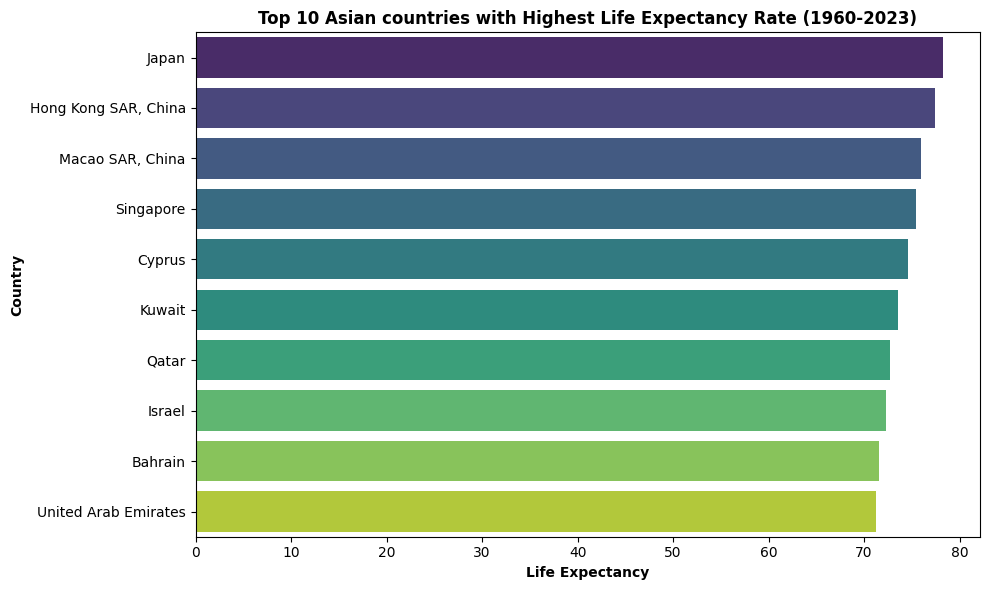

In [265]:
#plotting top 10 countries asia
top10_countries_asia=avg_asia.head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top10_countries_asia,y='Country Name',x='Life Expectancy',palette='viridis')
plt.title('Top 10 Asian countries with Highest Life Expectancy Rate (1960-2023)', fontweight='bold')
plt.xlabel('Life Expectancy',fontweight='bold')
plt.ylabel('Country',fontweight='bold')
plt.tight_layout()
plt.show()



/tmp/ipython-input-2863800911.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=least10_asian_countries,y='Country Name', x='Life Expectancy',palette='cividis')


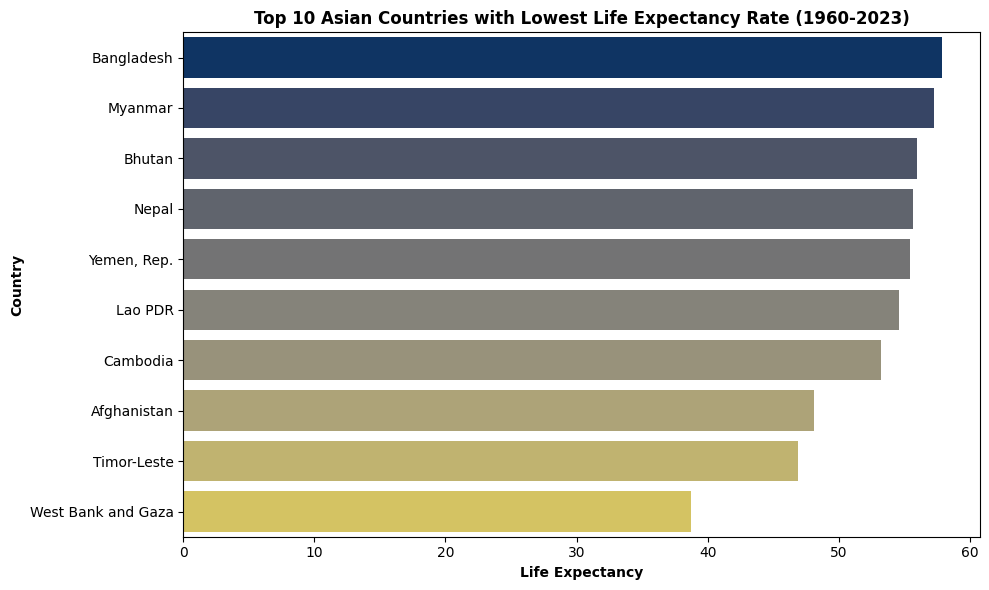

In [209]:
#plotting least 10 asian countries
least10_asian_countries=avg_asia.tail(10)
plt.figure(figsize=(10,6))
sns.barplot(data=least10_asian_countries,y='Country Name', x='Life Expectancy',palette='cividis')
plt.title('Top 10 Asian Countries with Lowest Life Expectancy Rate (1960-2023)',fontweight='bold')
plt.xlabel('Life Expectancy', fontweight='bold')
plt.ylabel('Country',fontweight='bold')
plt.tight_layout()
plt.show()

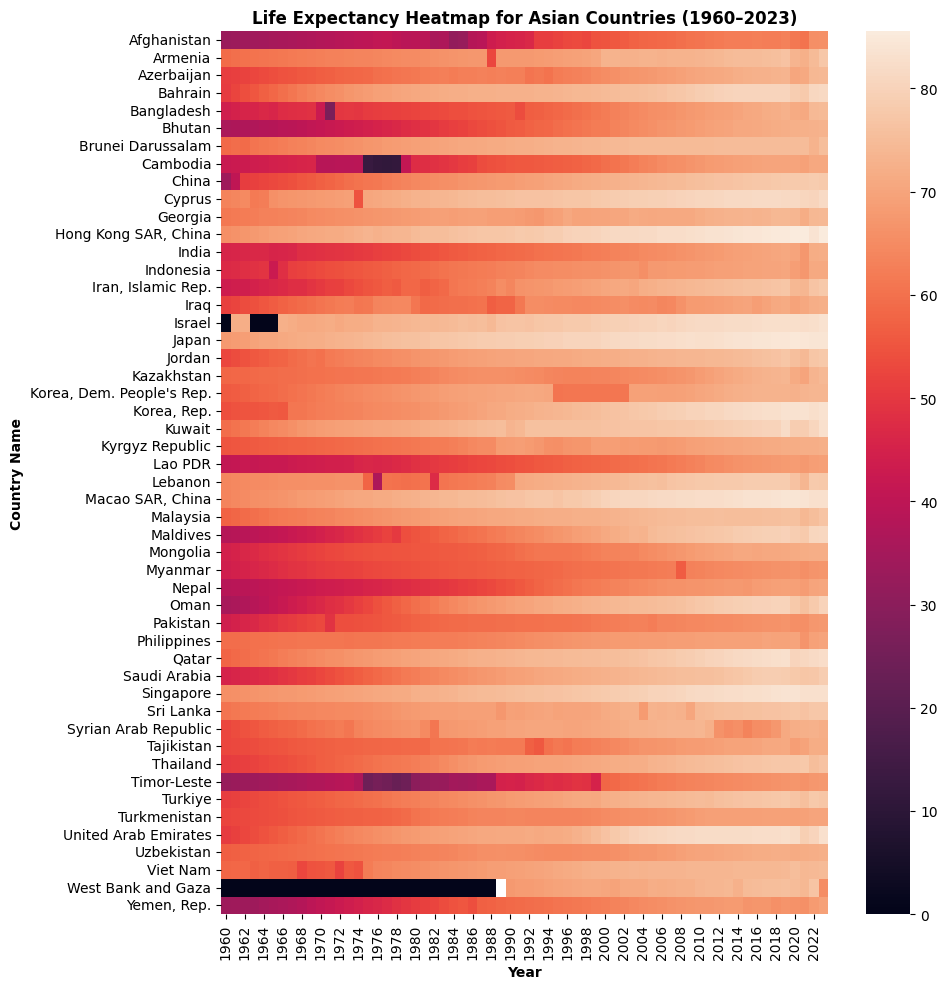

In [246]:
#plotting average life expectancy asia heatmap
asia_pivot=asia_df.pivot(index='Country Name',columns='Year', values='Life Expectancy')

plt.figure(figsize=(10,10))
sns.heatmap(data=asia_pivot,cmap=None,annot=False,fmt='.1f',)
plt.title("Life Expectancy Heatmap for Asian Countries (1960–2023)",fontweight='bold')
plt.xlabel("Year", fontweight='bold')
plt.ylabel("Country Name", fontweight='bold')
plt.tight_layout()
plt.show()

**Prediction on Asia Average Life Expectancy 2024-2049**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvm4_ipr3/te7hzdar.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvm4_ipr3/nedp73wr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52010', 'data', 'file=/tmp/tmpvm4_ipr3/te7hzdar.json', 'init=/tmp/tmpvm4_ipr3/nedp73wr.json', 'output', 'file=/tmp/tmpvm4_ipr3/prophet_modeldh6b2maf/prophet_model-20250915164012.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:40:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:40:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages

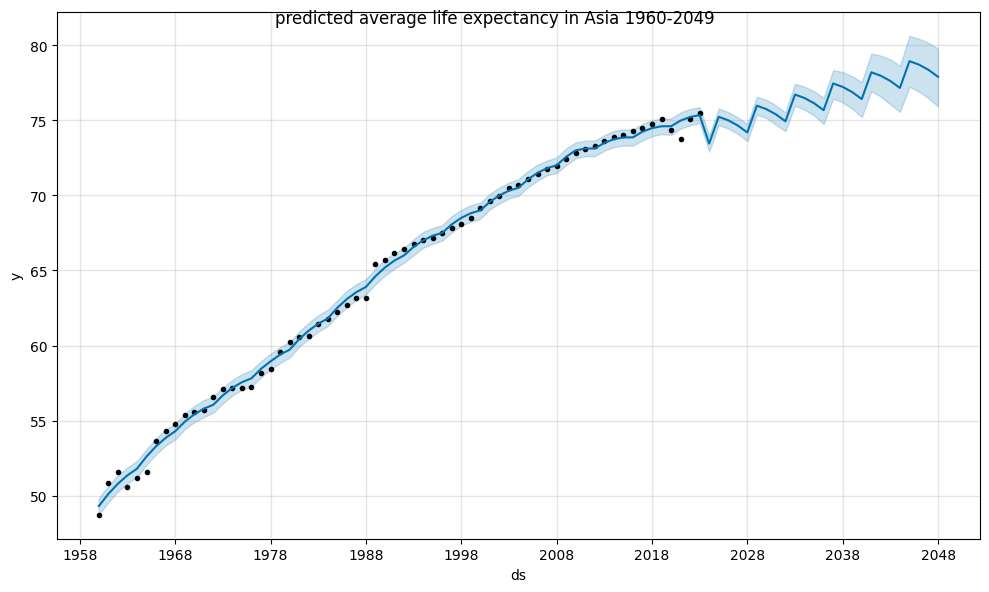

In [215]:
df_prophet_asia=asia_trend.rename(columns={'Year':'ds','Life Expectancy':'y'})
df_prophet_asia['ds']=pd.to_datetime(df_prophet_asia['ds'],format='%Y')
#training and fitting the model
model_asia=Prophet()
model_asia.fit(df_prophet_asia)
#future years prediction
future_asia=model_asia.make_future_dataframe(periods=25, freq='Y')
forecast_asia=model_asia.predict(future_asia)
#plotting the outcome
fig_asia=model_asia.plot(forecast_asia)
fig_asia.suptitle ('predicted average life expectancy in Asia 1960-2049')
fig_asia.show()

**Summary of projected Average life Expectancy Asia 1960-2049**

**Historical Trends (1960-~2023):** The graph illustrates a dramatic and consistent increase in life expectancy over this period. The black dots show the historical data, rising from around 45 years in 1960 to over 73 years by 2023. This significant increase highlights major public health and economic improvements across the continent.

**Recent Dip (around 2020-2021):** There is a small but noticeable dip in the data points during the early 2020s, which is consistent with the impact of the COVID-19 pandemic. This temporary decline was quickly followed by a rebound.

**Future Projection (2023-2049):** The solid blue line projects a continued, but slowing, increase in average life expectancy. It is predicted to reach around 79 years by 2049. The light blue shaded area widens over time, representing the increasing uncertainty of the long-term prediction.

**Oceania Trend Analysis**

In [218]:
#creating oceania df
oceania_df=df_long[df_long['Continent']=='Oceania'].copy()
oceania_df

,Country Name,Continent,Year,Life Expectancy
3,American Samoa,Oceania,1960,65.053000
10,Australia,Oceania,1960,70.817073
65,Fiji,Oceania,1960,58.602000
68,French Polynesia,Oceania,1960,59.445000
78,Guam,Oceania,1960,62.882000
...,...,...,...,...
13770,Samoa,Oceania,2023,71.698000
13782,Solomon Islands,Oceania,2023,70.528000
13802,Tonga,Oceania,2023,72.895000
13808,Tuvalu,Oceania,2023,67.105000


In [229]:
#creating oceania trend
oceania_trend=oceania_df.groupby('Year')['Life Expectancy'].mean().reset_index()
oceania_trend

,Year,Life Expectancy
0,1960,56.637561
1,1961,57.063660
2,1962,57.487902
3,1963,57.946116
4,1964,58.187065
...,...,...
59,2019,71.732163
60,2020,71.525584
61,2021,71.119069
62,2022,72.161976


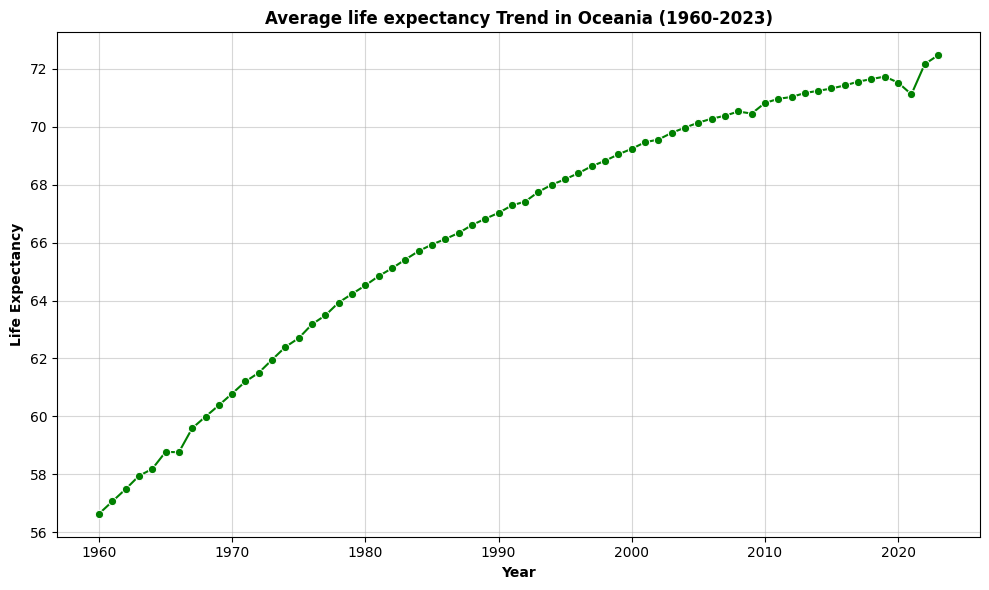

In [283]:
#plotting oceania trend
plt.figure(figsize=(10,6))
sns.lineplot(data=oceania_trend,x='Year',y='Life Expectancy', color='green',marker='o')
plt.title('Average life expectancy Trend in Oceania (1960-2023)', fontweight='bold')
plt.xlabel('Year',fontweight='bold')
plt.ylabel('Life Expectancy',fontweight='bold')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

**Summary of Average Life Expectancy Trend Oceania 1960-2023**

Consistent Upward Trend: The graph shows a steady and continuous increase in the average life expectancy in Oceania from 1960 to 2023. It started at around 56.5 years and rose to over 72 years by the end of the period.

Rapid Initial Gains: The rate of increase was particularly fast in the first two decades, from the 1960s to the 1980s, where life expectancy rose significantly.

Slowing Rate of Increase: The curve becomes more gradual after the 1990s, indicating that while life expectancy continued to rise, the pace of improvement slowed down.

COVID-19 Impact: There is a slight drop in the data around 2020-2021, which is consistent with the global impact of the COVID-19 pandemic on life expectancy. The trend quickly rebounded in 2022 and 2023.

In [243]:
#oceania countries
avg_oceania=oceania_df.groupby('Country Name')['Life Expectancy'].mean().reset_index().sort_values(by='Life Expectancy', ascending=False)
avg_oceania

,Country Name,Life Expectancy
1,Australia,77.020541
10,New Zealand,76.279055
3,French Polynesia,72.974406
4,Guam,72.118672
11,Northern Mariana Islands,71.271922
0,American Samoa,70.090359
9,New Caledonia,68.755922
16,Tonga,67.474688
14,Samoa,66.583422
2,Fiji,64.256797


/tmp/ipython-input-3215185447.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_oceania,y='Country Name',x='Life Expectancy',palette='viridis')


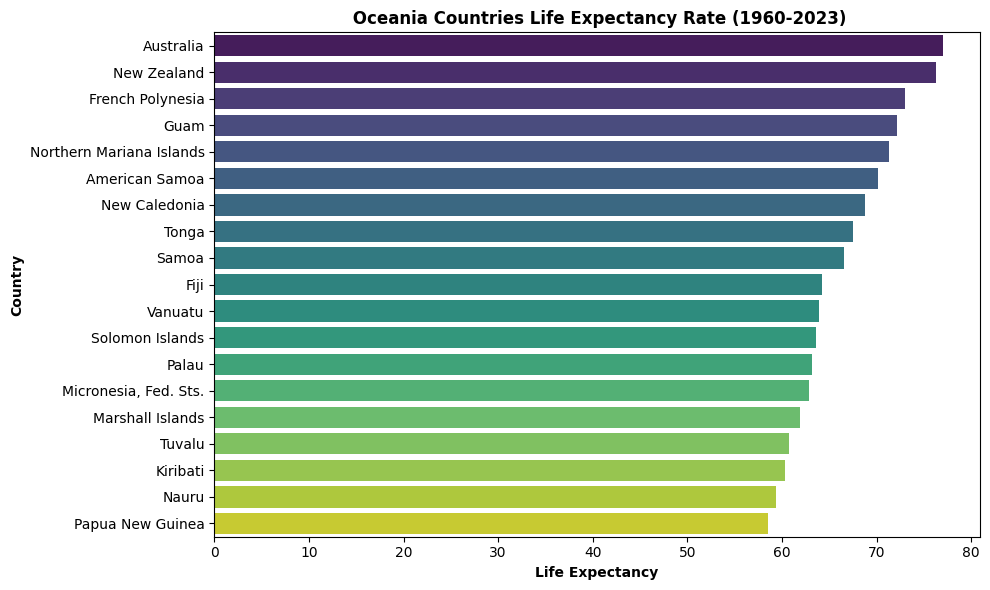

In [244]:
#plotting Oceania countries
plt.figure(figsize=(10,6))
sns.barplot(data=avg_oceania,y='Country Name',x='Life Expectancy',palette='viridis')
plt.title(' Oceania Countries Life Expectancy Rate (1960-2023)',fontweight='bold')
plt.xlabel('Life Expectancy', fontweight='bold')
plt.ylabel('Country',fontweight='bold')
plt.tight_layout()
plt.show()

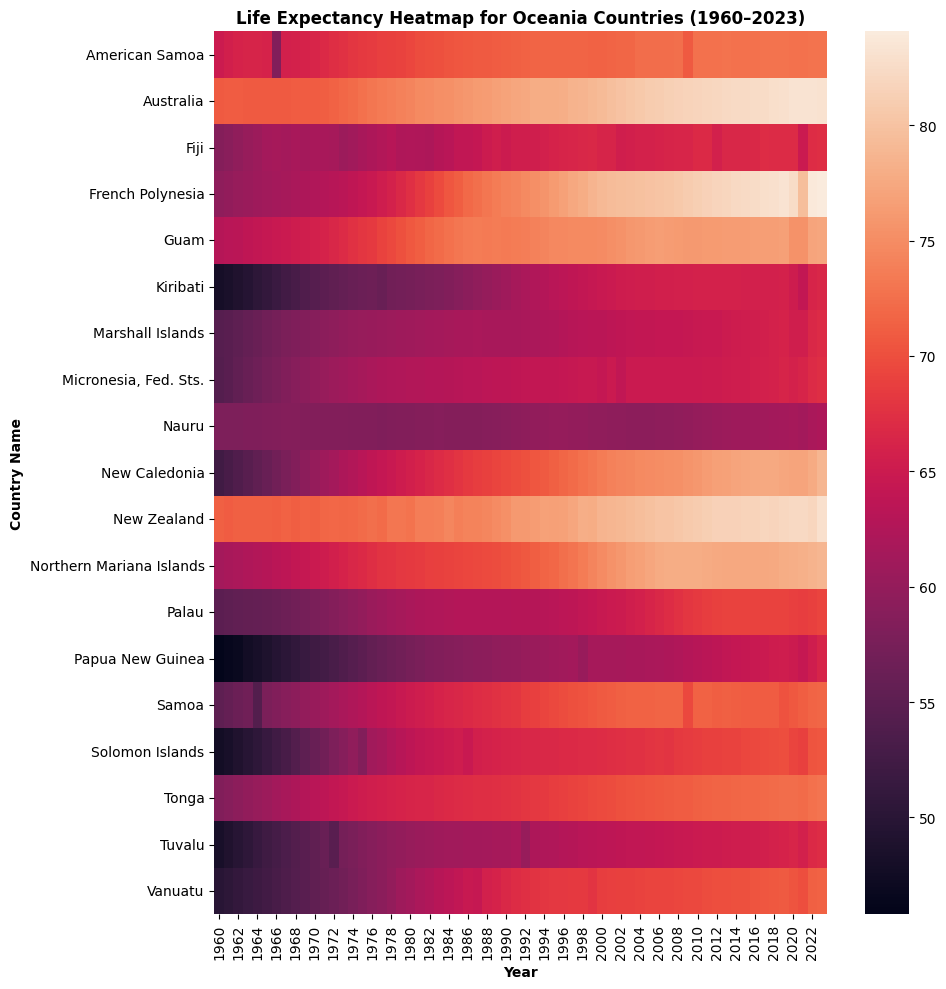

In [245]:
#oceania life expectancy heatmap
oceania_pivot=oceania_df.pivot(index='Country Name',columns='Year',values='Life Expectancy')
plt.figure(figsize=(10,10), )
sns.heatmap(data=oceania_pivot, annot=None, fmt='.1f', cmap=None)
plt.title("Life Expectancy Heatmap for Oceania Countries (1960–2023)",fontweight='bold')
plt.xlabel("Year", fontweight='bold')
plt.ylabel("Country Name", fontweight='bold')
plt.tight_layout()
plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvm4_ipr3/r__me9bq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvm4_ipr3/c5ufvbaa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19779', 'data', 'file=/tmp/tmpvm4_ipr3/r__me9bq.json', 'init=/tmp/tmpvm4_ipr3/c5ufvbaa.json', 'output', 'file=/tmp/tmpvm4_ipr3/prophet_model7_0665sz/prophet_model-20250915200600.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:06:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:06:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages

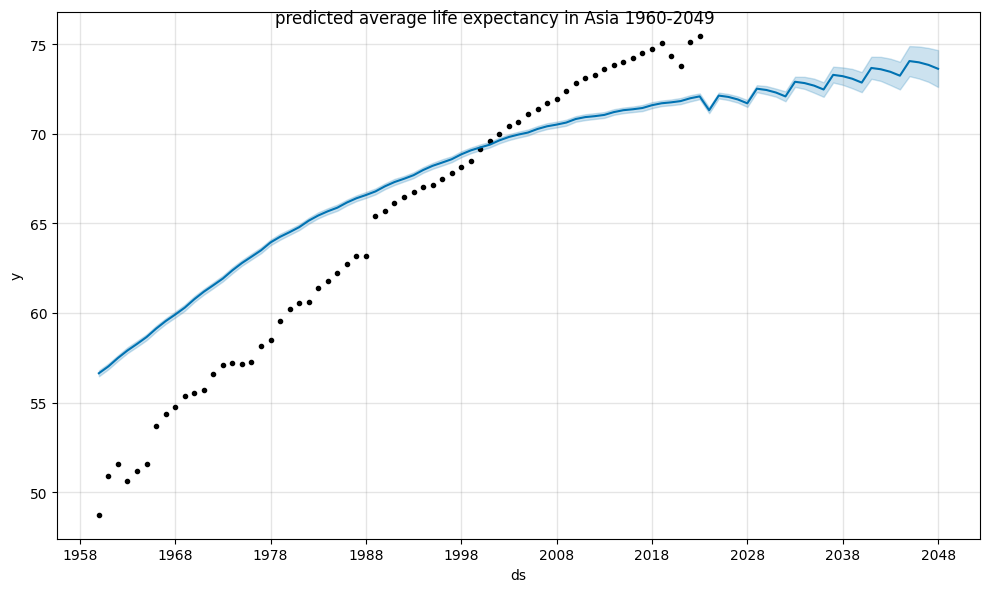

In [277]:
prophet_oceania=oceania_trend.rename(columns={'Year':'ds','Life Expectancy':'y'})
prophet_oceania['ds']=pd.to_datetime(prophet_oceania['ds'],format='%Y')

model_oceania=Prophet()
model_oceania.fit(prophet_oceania)
#future years prediction
future_oceania=model_oceania.make_future_dataframe(periods=25, freq='Y')
forecast_oceania=model_oceania.predict(future_oceania)
#plotting the outcome
fig_asia=model_asia.plot(forecast_oceania,)
fig_asia.suptitle ('predicted average life expectancy in Asia 1960-2049')
fig_asia.show()

**Summary of projected Average life Expectancy Oceania 1960-2049**

**Consistent Increase (1960-~2023):** The graph shows a steady and significant increase in life expectancy over this period. The historical data points (black dots) demonstrate a rise from approximately 56.5 years in 1960 to over 72 years by 2023.

**COVID-19 Impact:** There is a noticeable, but small, dip in the data around 2020-2021 due to the COVID-19 pandemic. The data quickly rebounds, returning to the long-term upward trend.

**Future Projections (2023-2049):** The solid blue line indicates that average life expectancy is projected to continue to rise, albeit at a more gradual pace. The prediction is that it will reach roughly 76 years by 2049.

**Uncertainty:** The light blue shaded area around the projected line represents the uncertainty of the forecast. This band of uncertainty widens as the projection goes further into the future.